In [188]:
#laptop price


In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [196]:
df = pd.read_csv("data\\laptops.csv")

In [198]:
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


<hr><font color="green"><h1>from file: 2.price-prediction-on-laptops</h1></font>

# **Introduction**

* **This project shows a Laptop price prediction system by using the supervised machine learning technique. The research uses random decision forest as the machine learning prediction method which offered 88.7% prediction precision.**

* **Using random decision forest, there are multiple independent variables but one and only one dependent variable whose actual and predicted values are compared to find precision of results.**

* **This project proposes a system where price is dependent variable which is predicted, and this price is derived from factors like Laptop’s model, RAM, ROM (HDD/SSD), GPU, CPU, IPS Display, and Touch Screen.**

# **Importing Libraries**

In [205]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

# **Loading the data**

In [208]:
df = pd.read_csv('data\\laptop_data.csv')
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [210]:
df.columns

Index(['Unnamed: 0', 'Company', 'TypeName', 'Inches', 'ScreenResolution',
       'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight', 'Price'],
      dtype='object')

# **Data Cleaning**

**So we can see that there is column named "Unnamed: 0", which is a unnecessary data for this project. So we can safely drop the column from the dataset.**

In [214]:
# Using drop function to 
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [216]:
# Checking if the dataset has any null values in it
df.isnull().sum()

Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

**We can observe that there is no null values in the dataset**

**Below line shows that we are checking for the duplicated rows in the dataset and sum the number of those duplicated rows**

In [220]:
print(df.duplicated().sum())
print(df.shape)

29
(1303, 11)


**Using drop_duplicates we droped the duplicated rows in the dataset**

In [222]:
df = df.drop_duplicates()
df.shape

(1274, 11)

In [223]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   object 
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   object 
 10  Price             1274 non-null   float64
dtypes: float64(2), object(9)
memory usage: 119.4+ KB


**Next, from the info we got from dataset, we can separate them as numrical values and categorical values to show the difference which features we will use for the analysis. Understanding this will help us in analysing the data more efficiently**

In [225]:
# Separating categorical and numerical values
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index(['Company', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory',
        'Gpu', 'OpSys', 'Weight'],
       dtype='object'),
 Index(['Inches', 'Price'], dtype='object'))

**Now, we are trying to get info of all the columns of the datasets. And also to check how many number of values are present in each column**

In [228]:
def uniquevals(col):
    print(f'Details of the particular col {col} is : {df[col].unique()}')
    
def valuecounts(col):
    print(f'Valuecounts of the particular col {col} is : {df[col].value_counts()}')
    
# Calling uniquevals function
for col in df.columns:
    uniquevals(col)
    print("-"*75)

Details of the particular col Company is : ['Apple' 'HP' 'Acer' 'Asus' 'Dell' 'Lenovo' 'Chuwi' 'MSI' 'Microsoft'
 'Toshiba' 'Huawei' 'Xiaomi' 'Vero' 'Razer' 'Mediacom' 'Samsung' 'Google'
 'Fujitsu' 'LG']
---------------------------------------------------------------------------
Details of the particular col TypeName is : ['Ultrabook' 'Notebook' 'Netbook' 'Gaming' '2 in 1 Convertible'
 'Workstation']
---------------------------------------------------------------------------
Details of the particular col Inches is : [13.3 15.6 15.4 14.  12.  11.6 17.3 10.1 13.5 12.5 13.  18.4 13.9 12.3
 17.  15.  14.1 11.3]
---------------------------------------------------------------------------
Details of the particular col ScreenResolution is : ['IPS Panel Retina Display 2560x1600' '1440x900' 'Full HD 1920x1080'
 'IPS Panel Retina Display 2880x1800' '1366x768'
 'IPS Panel Full HD 1920x1080' 'IPS Panel Retina Display 2304x1440'
 'IPS Panel Full HD / Touchscreen 1920x1080'
 'Full HD / Touchscreen 19

**So on observation we can see that if we remove "GB" from RAM,i can make it as an integer value then after,now same goes with Memory as well as Weight,for Weight i can classify it as floating variable using the str.replace() as shown ↓**

In [232]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

# converting from string->integer for ram column

df['Ram'] = df['Ram'].astype('int32')

# converting from string-> float for the weight column

df['Weight'] = df['Weight'].astype('float32')

df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 109.5+ KB


# **Exploratory Data Analysis**

# **Price Distribution plot**

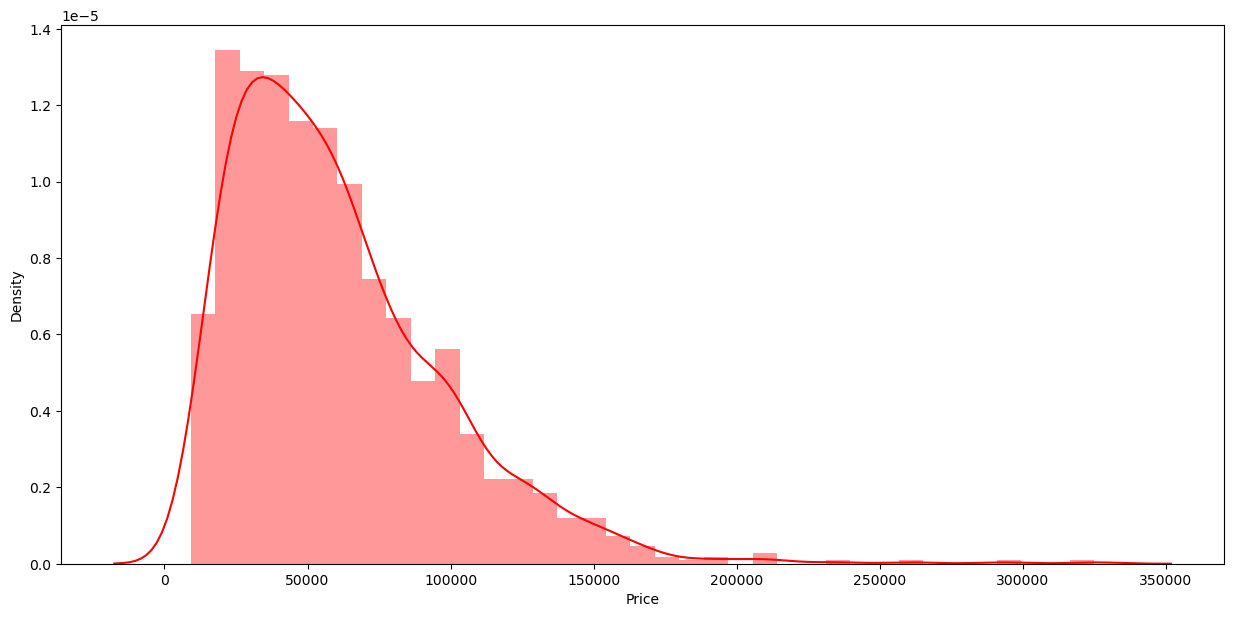

In [236]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'],color='red')
plt.show()

# **Countplot for Categorical variables**

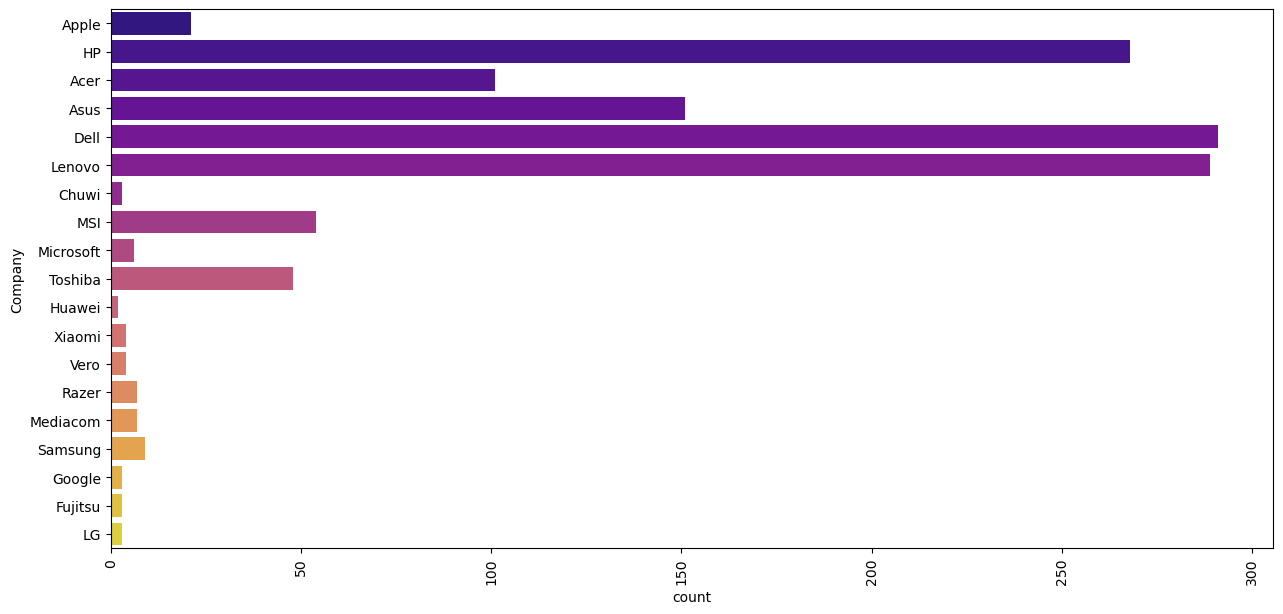

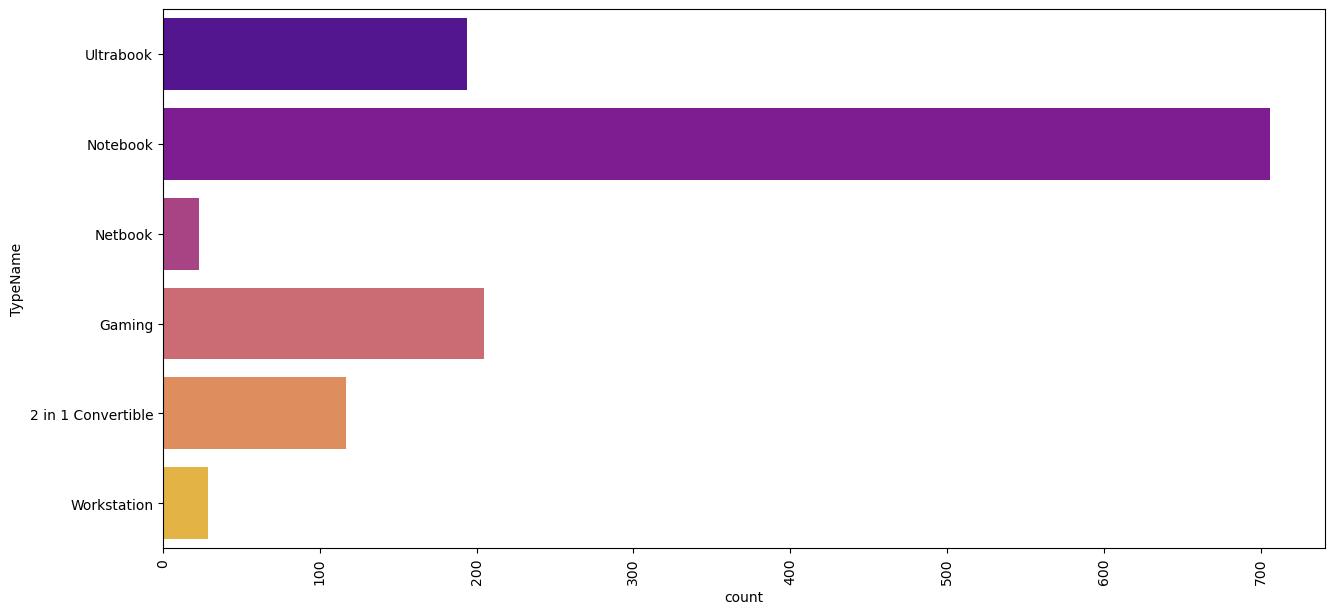

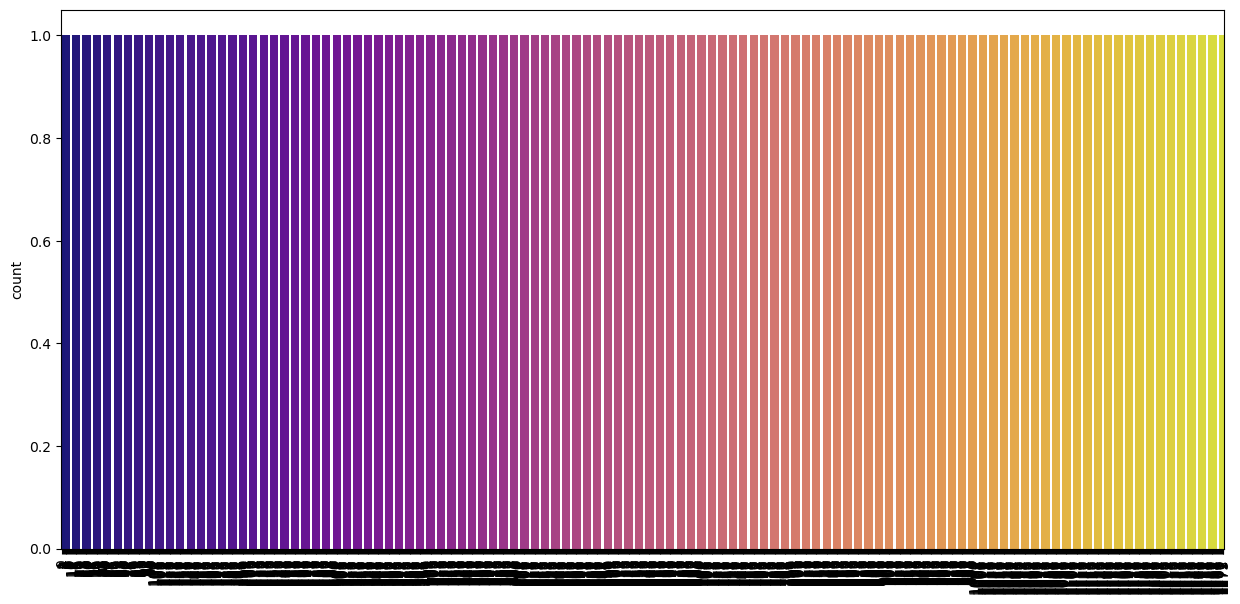

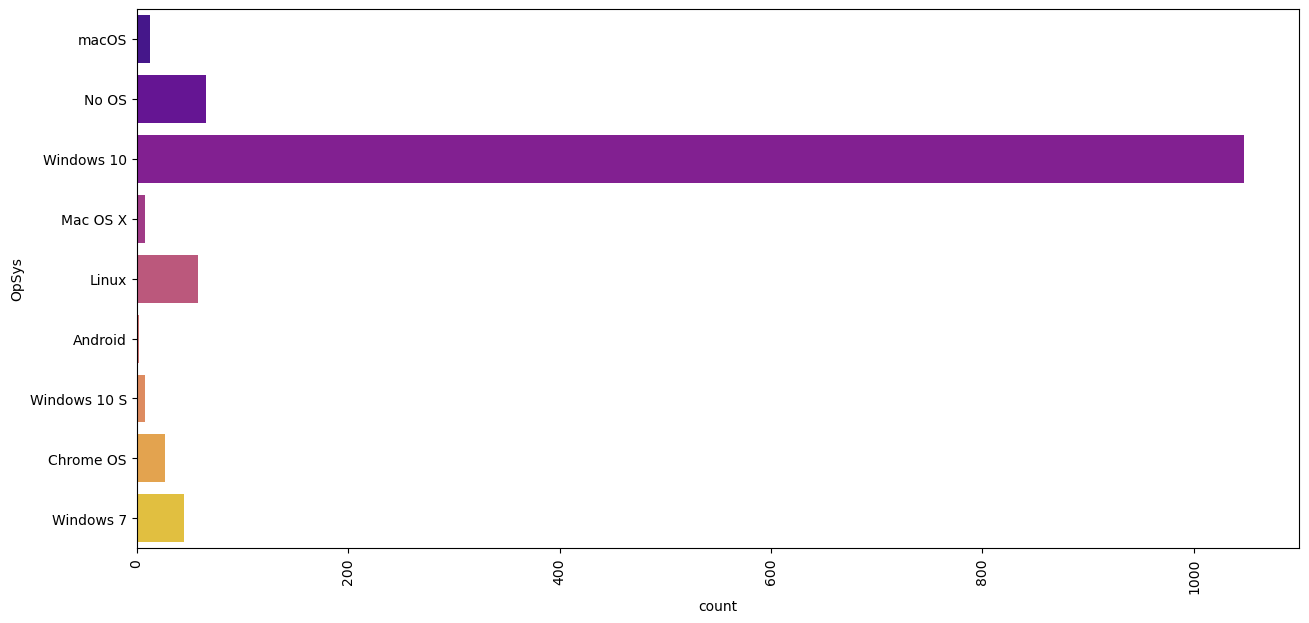

In [238]:
def drawplot(col):
    plt.figure(figsize=(15,7))
    sn.countplot(df[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Company', 'TypeName','Ram','OpSys']
for col in toview:
    drawplot(col)

# **Barplot - Average price for each Laptop brands**

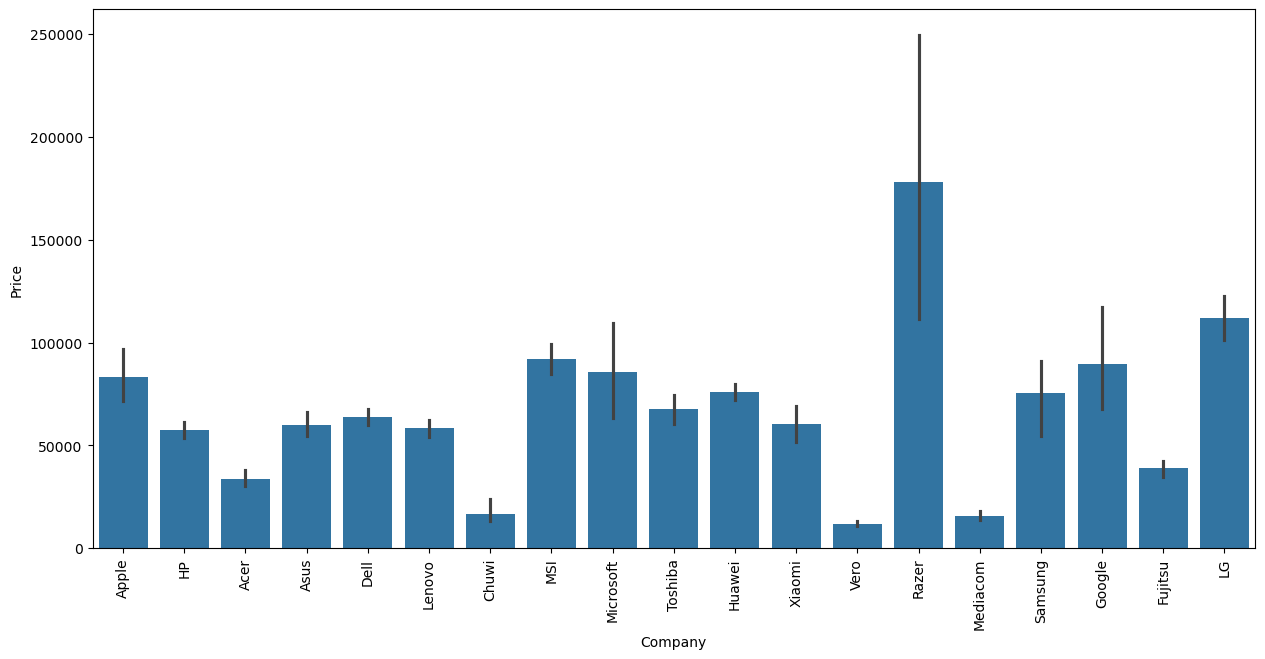

In [240]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['Company'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# **Countplot for Laptop types**

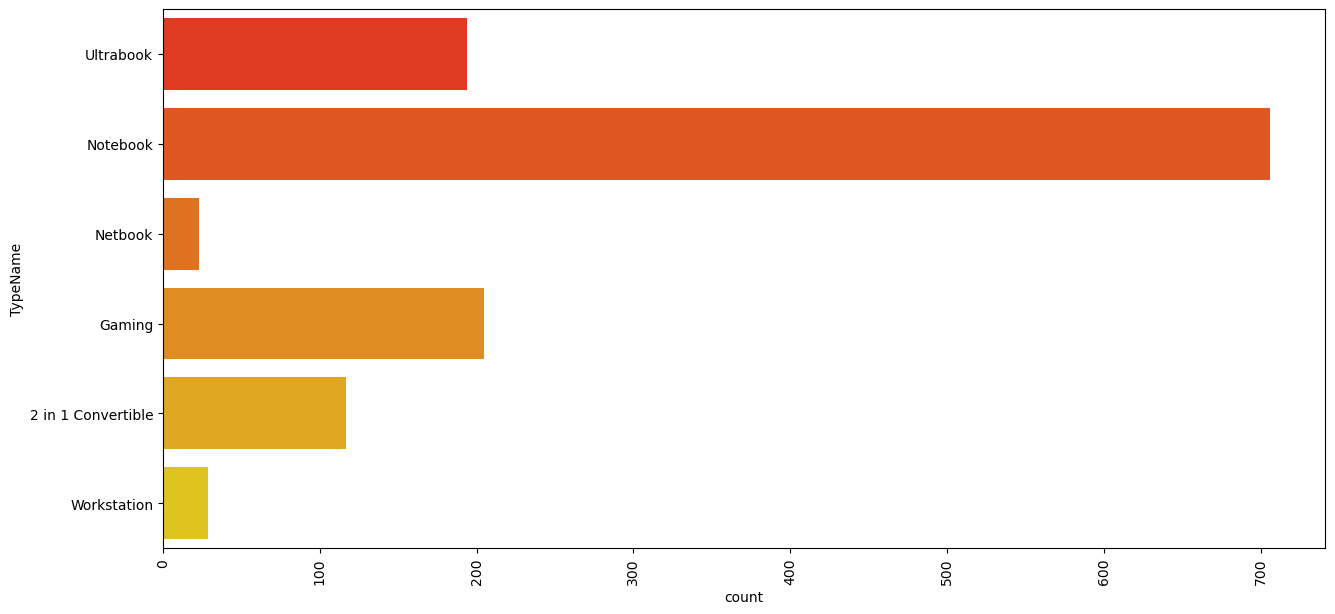

In [242]:
plt.figure(figsize=(15,7))
sn.countplot(df['TypeName'],palette='autumn')
plt.xticks(rotation = 'vertical')
plt.show()

# **Barplot - Price variation on each Laptop type**

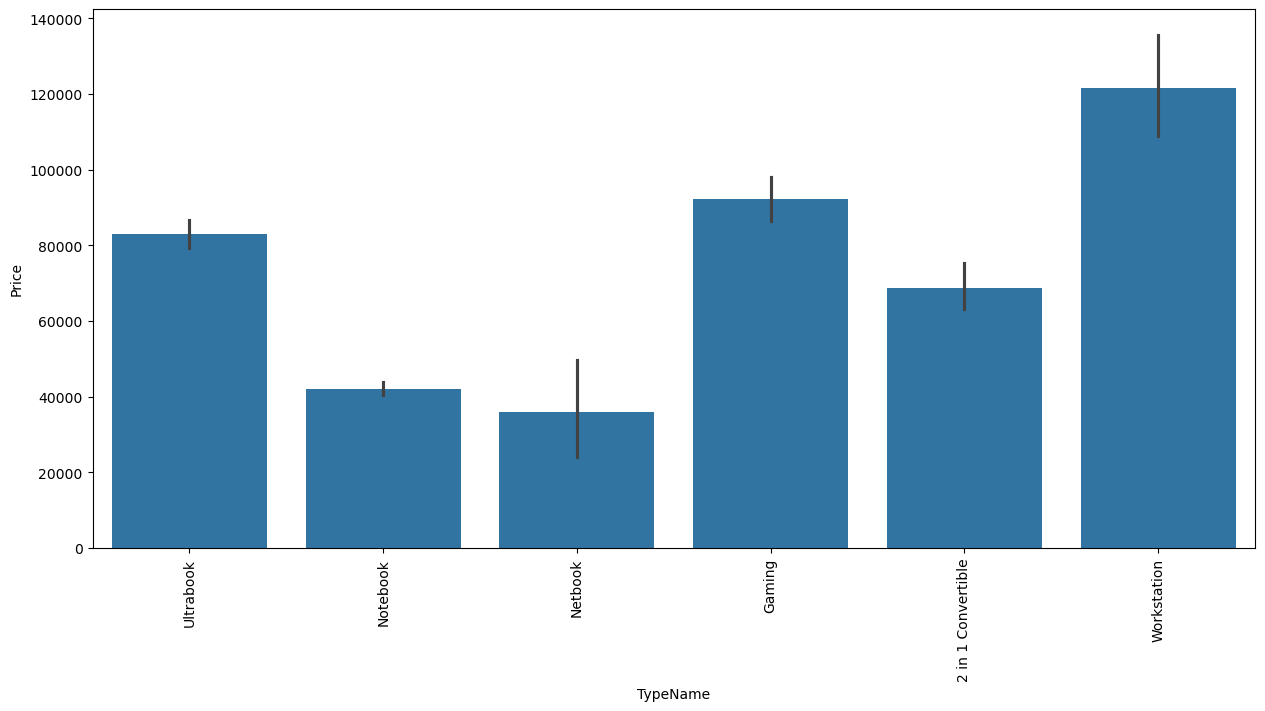

In [244]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TypeName'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# **Scatterplot - Price variation for different inches of laptops**

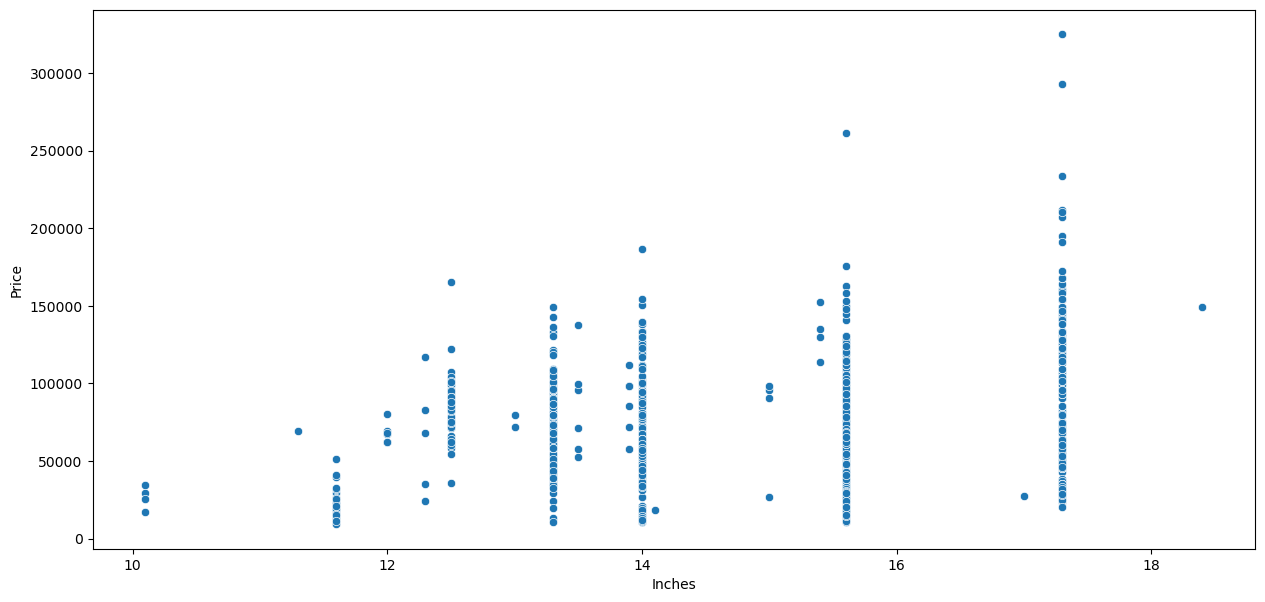

In [246]:
plt.figure(figsize=(15,7))
sn.scatterplot(x = df['Inches'],y = df['Price'])
plt.show()

**In data analysis, we can ignore the outliers most of the time, since its just a genral visulization of data**

# **Screen Resolution feature analysis**

**For the `Screen Resolution` column we have many types of Screen Resolutions out there as shown `Touch Screen` and `Normal` and `IPS Panel` are the 3 parts on basis of which we can segregate the things**

In [250]:
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                505
1366x768                                         262
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         51
Full HD / Touchscreen 1920x1080                   47
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  15
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160               10
4K Ultra HD 3840x2160                              7
Touchscreen 2560x1440                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x1440                    5
IPS Panel Quad HD+ / Touchscr

# **Creating new column - Touchscreen**

In [254]:
df['TouchScreen'] = df['ScreenResolution'].apply(lambda element:1 if 'Touchscreen' in element else 0)
df.sample(10)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
1052,Dell,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,2.30,58288.320,1
296,Acer,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia GeForce GTX 1050 Ti,Linux,2.50,52161.120,0
377,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.60GHz,4,500GB HDD,Intel HD Graphics 400,Windows 10,1.80,16463.520,0
991,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,128GB SSD + 1TB HDD,AMD Radeon 520,Windows 10,2.10,26586.720,0
636,Dell,Ultrabook,13.3,Quad HD+ / Touchscreen 3200x1800,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.23,99580.320,1
771,Samsung,2 in 1 Convertible,15.0,Full HD / Touchscreen 1920x1080,Intel Core i7 7500U 2.7GHz,16,256GB SSD,AMD Radeon 540,Windows 10,1.71,95850.720,1
340,Dell,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics,Linux,2.20,14646.672,0
422,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31,76030.560,0
953,Asus,2 in 1 Convertible,12.5,Full HD 1920x1080,Intel Core M M7-6Y75 1.2GHz,8,64GB Flash Storage,Intel HD Graphics 515,Chrome OS,1.20,61751.520,0
854,Asus,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce GTX 930MX,Windows 10,2.30,41931.360,0


**In this column *'0'* represents not a touch screen latop and *'1'* represents its a touch screen laptop**

In [256]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
131,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,4,1TB HDD,AMD Radeon R5 M430,Windows 10,2.20,23922.720,0
365,HP,Notebook,15.6,1366x768,Intel Pentium Quad Core N3710 1.6GHz,8,2TB HDD,Intel HD Graphics 405,Windows 10,2.04,20725.920,0
1097,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,8,256GB SSD,Nvidia GeForce GTX 965M,Windows 10,2.60,85194.720,0
96,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,1TB HDD,AMD Radeon R5 M430,Linux,2.20,31962.672,0
295,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia GeForce GTX 1060,Windows 10,3.20,69210.720,0


# **Countplot for Touchscreen laptops**

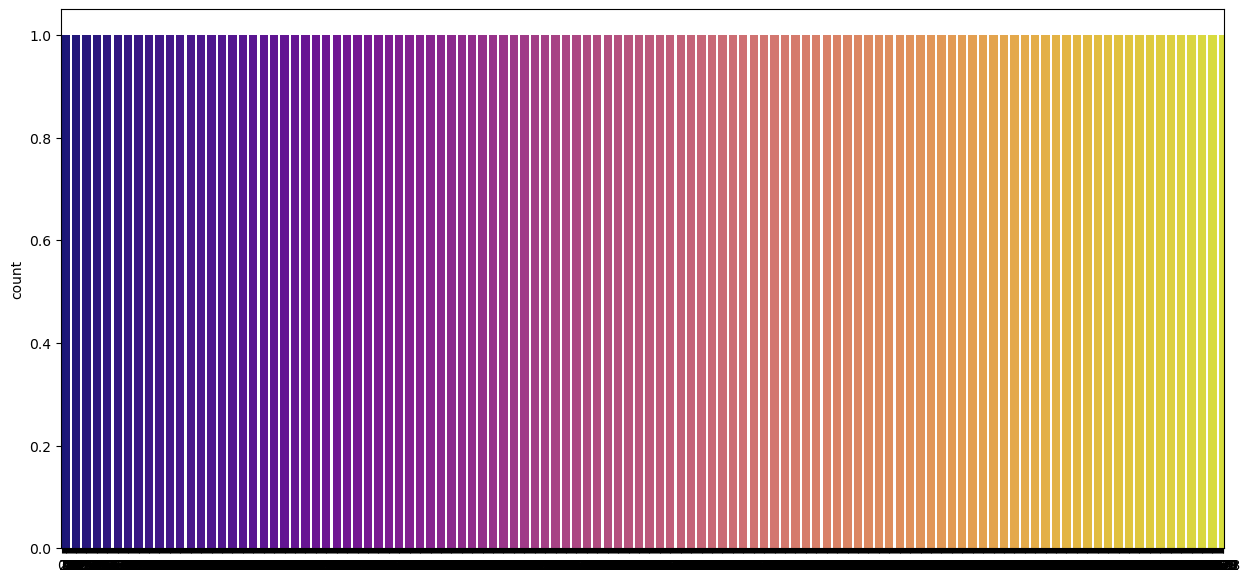

In [258]:
plt.figure(figsize=(15,7))
sn.countplot(df['TouchScreen'],palette='plasma')
plt.show()

# **Barplot - Price variation on Touch screen laptops**

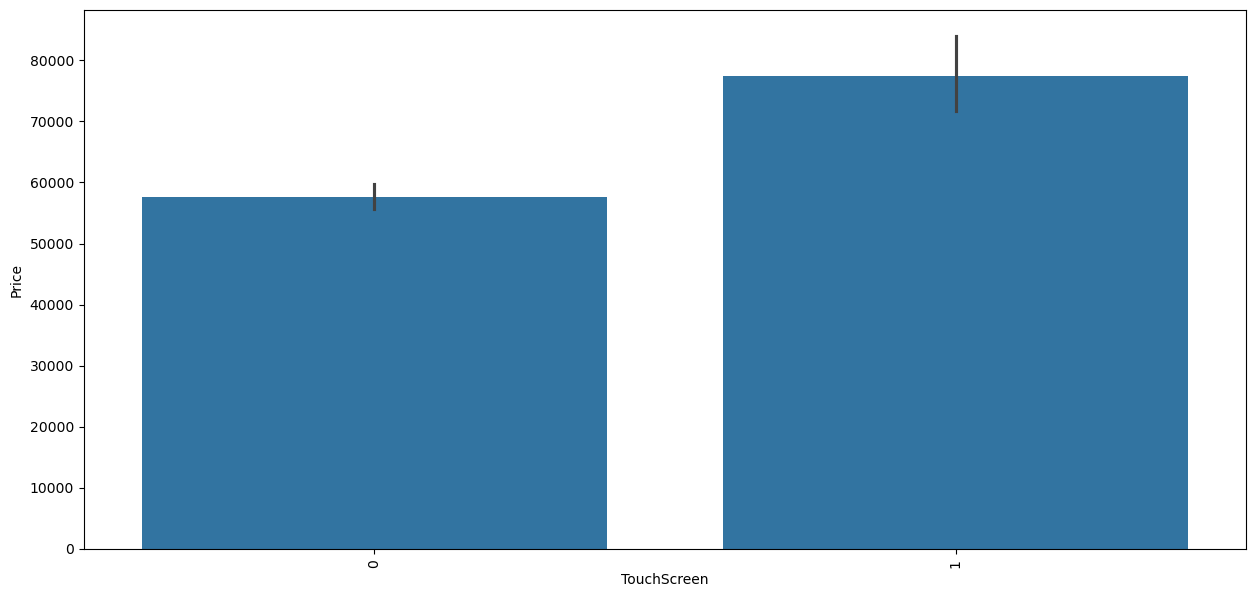

In [260]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# **Creating new column - IPS**

In [262]:
df['IPS'] = df['ScreenResolution'].apply(lambda element:1 if "IPS" in element else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
1036,HP,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.04,39533.7600,0,0
919,MSI,Gaming,15.6,Full HD 1920x1080,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,59668.8048,0,0
1126,Lenovo,2 in 1 Convertible,10.1,IPS Panel Touchscreen 1920x1200,Intel Atom x5-Z8550 1.44GHz,4,64GB Flash Storage,Intel HD Graphics 400,Windows 10,0.69,25521.1200,1,1
376,Lenovo,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Quad Core N3450 1.1GHz,4,128GB SSD,Intel HD Graphics 500,Windows 10,1.59,29463.8400,0,1
443,Lenovo,Notebook,15.6,Full HD 1920x1080,Intel Pentium Quad Core N4200 1.1GHz,4,128GB SSD,Intel HD Graphics 505,Windows 10,2.20,18594.7200,0,0


# **Countplot for IPS laptops**

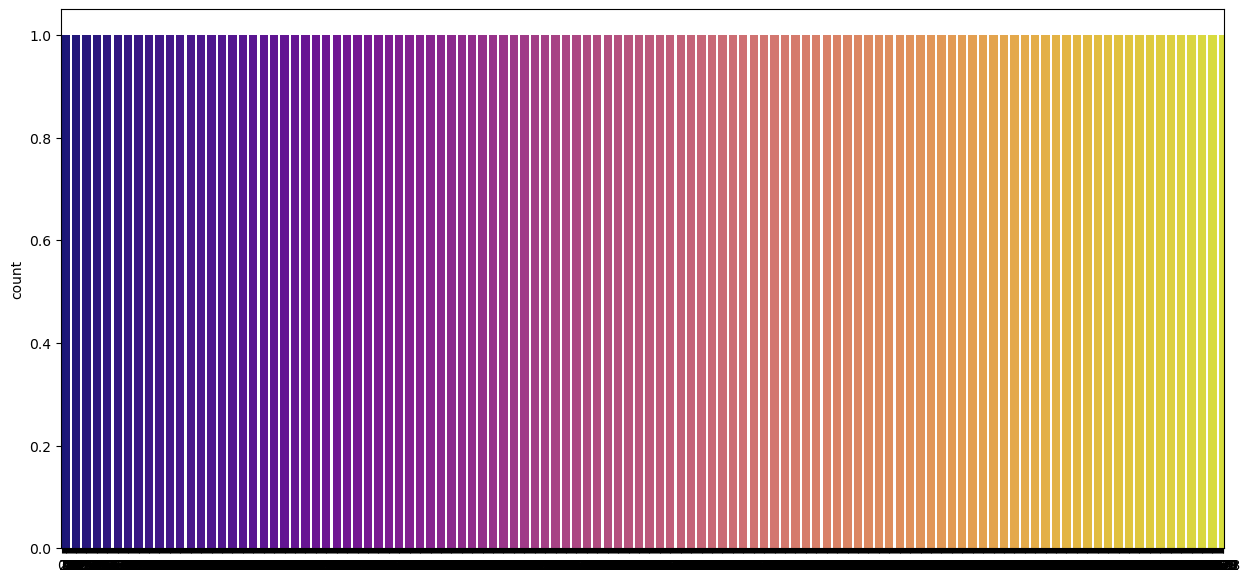

In [275]:
plt.figure(figsize=(15,7))
sn.countplot(df['IPS'],palette='plasma')
plt.show()

# **Barplot - Price variation with respect to IPS laptops**

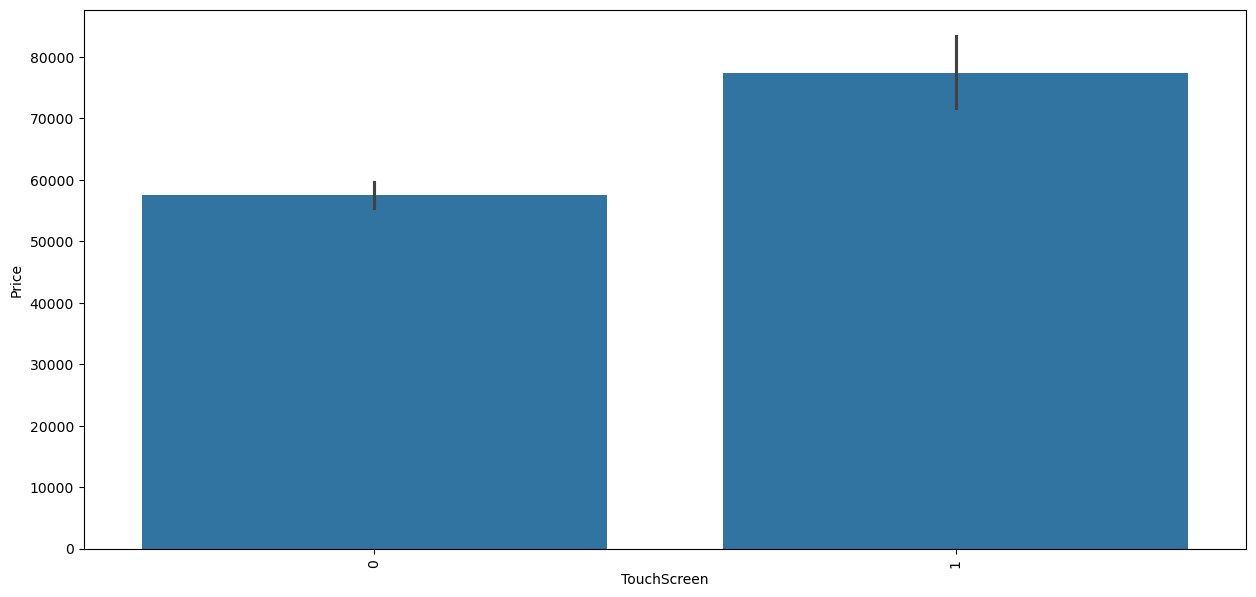

In [278]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['TouchScreen'],y = df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

# **Feature Engineering**

### **Extracting the X Resolution and the Y Resolution**

**We will split the text at the "x" letter and seperate the 2 parts from this we can observe that one of the col is Y res we need to do some feature engineering on the X res col**

In [283]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)
splitdf.head()

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600


In [284]:
splitdf = df['ScreenResolution'].str.split('x',n = 1,expand=True)

df['X_res'] = splitdf[0]
df['Y_res'] = splitdf[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [286]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
927,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.31,62071.2000,0,0,Full HD 1920,1080
65,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050 Ti,Windows 10,1.80,105654.2400,0,0,Full HD 1920,1080
135,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.63,52640.6400,0,0,Full HD 1920,1080
1223,Dell,Ultrabook,12.5,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1,0,Full HD / Touchscreen 1920,1080
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200,1,0,4K Ultra HD / Touchscreen 3840,2160


**So basically from that whole text of the X_res col,we need to extract the digits from it,but the problem is the numbers are scattered in some cases,that is the reason why i am using regex,if we use this we will exactly get the numbers which we are looking for!,so firstly replace all the "," with "" and then find all numbers from that string as "\d+\.?\d+",\d means that integer number and \.? all the numbers which come after an number and \d+ the string must end with number**

In [288]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [289]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
1268,HP,Netbook,11.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,2,32GB Flash Storage,Intel HD Graphics 400,Windows 10,1.17,11135.5200,0,0,1366,768
400,Lenovo,Notebook,15.6,1366x768,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.20,16303.6800,0,0,1366,768
1137,Dell,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,8,1TB HDD,AMD Radeon R7 M445,Windows 10,2.50,41771.5200,0,0,1366,768
43,Acer,Notebook,15.6,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,256GB SSD,Intel UHD Graphics 620,Windows 10,2.20,36336.9600,0,1,1920,1080
1085,HP,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4,500GB HDD,Intel HD Graphics 520,Windows 7,1.54,54931.1472,0,0,1920,1080


In [290]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   object 
 14  Y_res             1274 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(2), object(9)
memory usage: 149.3+ KB


In [291]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1274 entries, 0 to 1273
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1274 non-null   object 
 1   TypeName          1274 non-null   object 
 2   Inches            1274 non-null   float64
 3   ScreenResolution  1274 non-null   object 
 4   Cpu               1274 non-null   object 
 5   Ram               1274 non-null   int32  
 6   Memory            1274 non-null   object 
 7   Gpu               1274 non-null   object 
 8   OpSys             1274 non-null   object 
 9   Weight            1274 non-null   float32
 10  Price             1274 non-null   float64
 11  TouchScreen       1274 non-null   int64  
 12  IPS               1274 non-null   int64  
 13  X_res             1274 non-null   int32  
 14  Y_res             1274 non-null   int32  
dtypes: float32(1), float64(2), int32(3), int64(2), object(7)
memory usage: 139.3+ KB


# **Heatmap - Correlation between all features**

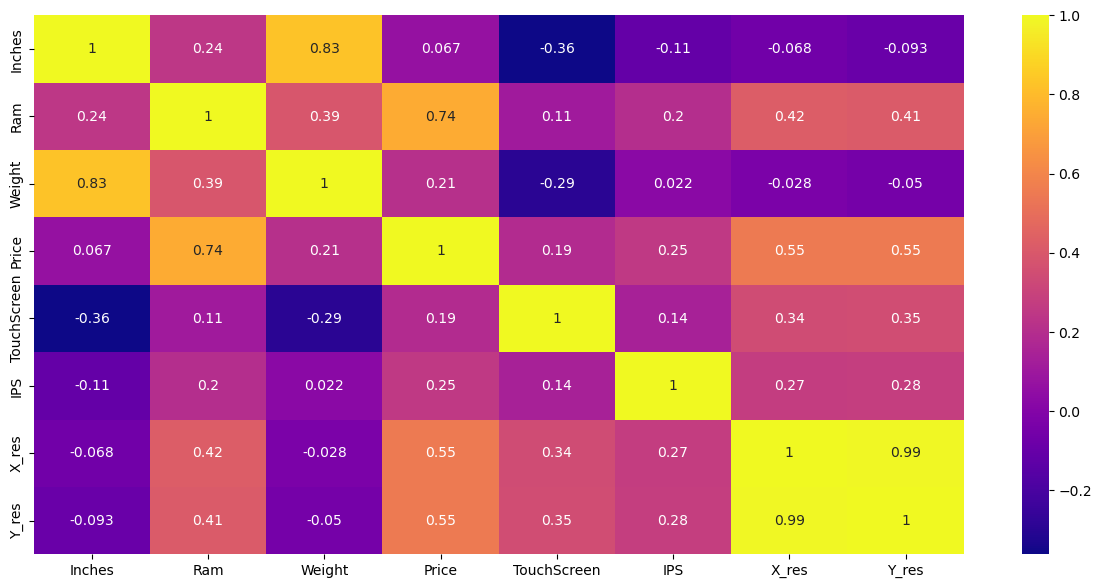

In [293]:
numeric_df = df.select_dtypes(include=[float, int])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
numeric_df = numeric_df.dropna()
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Filter numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
plt.figure(figsize=(15,7))
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()


In [295]:
numeric_df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
Name: Price, dtype: float64

# **Creating PPI column in the dataset**

**From the correlation plot we observed that as the X_res and Y_res is increasing,the price of the laptop is also increasing,so `X_res and Y_res` are positively correlated and they are giving much information,so that is the reason why i had splitted `Resolution` column into `X_res and Y_res` columns respectively**

**So to make things good,we can create a new column named `PPI{pixels per inch}`,now  as we saw from the correlation plot that the `X_res and Y_res` are having much collinearity,so why not combine them with `Inches` which is having less collinearity,so we will combine them as follows ↓,so here is the formula of how to calculate `PPI` {pixels per inch}**

$$
    PPI(pixels per inch) = \frac{\sqrt{X_resolution^2+Y_resolution^2}}{inches}
$$

In [308]:
df['PPI'] = (((df['X_res']**2+df['Y_res']**2))**0.5/df['Inches']).astype('float')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


# **Heatmap - After adding PPI**

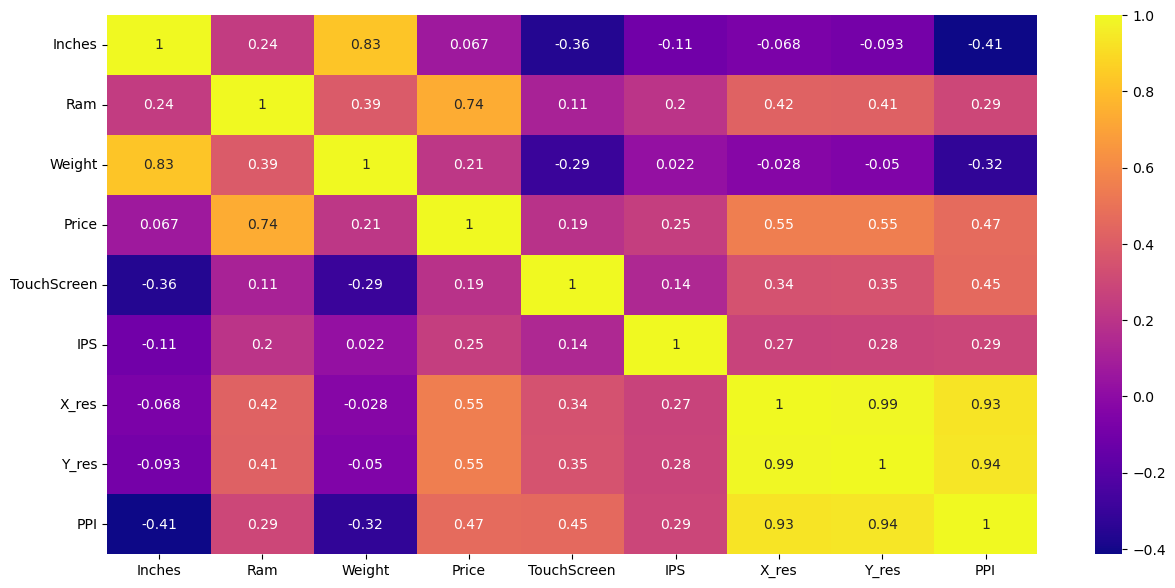

In [313]:
numeric_df = df.select_dtypes(include=[float, int])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
numeric_df = numeric_df.dropna()
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Filter numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
plt.figure(figsize=(15,7))
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

In [314]:
numeric_df.corr()['Price']

Inches         0.066990
Ram            0.740106
Weight         0.212192
Price          1.000000
TouchScreen    0.188631
IPS            0.250358
X_res          0.552074
Y_res          0.548111
PPI            0.469539
Name: Price, dtype: float64

**So as we observe from the correlation data that the `PPI` is having good correlation,so we will be using that,as that is a combination of 3 features and that gives collective results of 3 columns,so we will drop `Inches,X_res,Y_res` as well**

In [318]:
df.drop(columns=['ScreenResolution','Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


# **CPU Analysis**

**Now we will work on `CPU` column,as that also has much text data and we need to process it efficiently as we may get good insights from them**

In [322]:
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     190
Intel Core i7 7700HQ 2.8GHz    146
Intel Core i7 7500U 2.7GHz     132
Intel Core i7 8550U 1.8GHz      73
Intel Core i5 8250U 1.6GHz      72
                              ... 
Intel Core M M3-6Y30 0.9GHz      1
AMD A9-Series 9420 2.9GHz        1
Intel Core i5 2.9GHz             1
AMD A6-Series 7310 2GHz          1
AMD A9-Series 9410 2.9GHz        1
Name: count, Length: 118, dtype: int64

**Most common processors are made by intel right,so we will be clustering their `processors` into different categories like `i5,i7,other`,now other means the processors of intel which do not have i3,i5 or i7 attached to it,they're completely different so that's the reason i will clutter them into `other` and other category is `AMD` which is a different category in whole**

**So if we observe we need to extract the first 3 words of the CPU column,as the first 3 words of every row under the CPU col is the type of the CPU,so we will be using them as shown ↓**

In [325]:
df['CPU_name'] = df['Cpu'].apply(lambda text:" ".join(text.split()[:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


**As mentioned earlier,if we get any of the intel `i3,i5 or i7` versions we will return them as it is,but if we get any other processor we will first check whether is that a variant of the intel? or not if yes,then we will tag it as "Other Intel Processor" else we will say it as `AMD Processor`**

In [328]:
def processortype(text):
    
    if text=='Intel Core i7' or text=='Intel Core i5' or text=='Intel Core i3':
        return text
    
    else:
        if text.split()[0]=='Intel':
            return 'Other Intel Processor'
        
        else:
            return 'AMD Processor'
        
    
    
df['CPU_name'] = df['CPU_name'].apply(lambda text:processortype(text))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# **Countplot for number of CPUs**

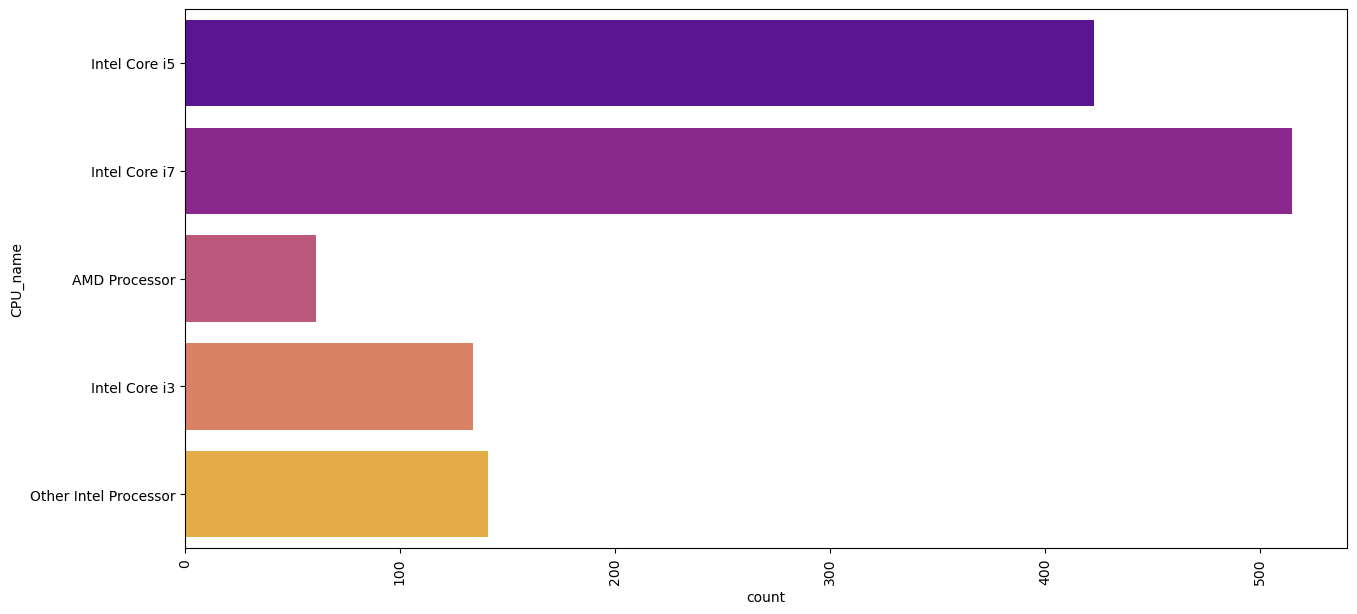

In [331]:
plt.figure(figsize=(15,7))
sn.countplot(df['CPU_name'],palette='plasma')
plt.xticks(rotation = 'vertical')
plt.show()

# **Barplot - Price vs CPU variation**

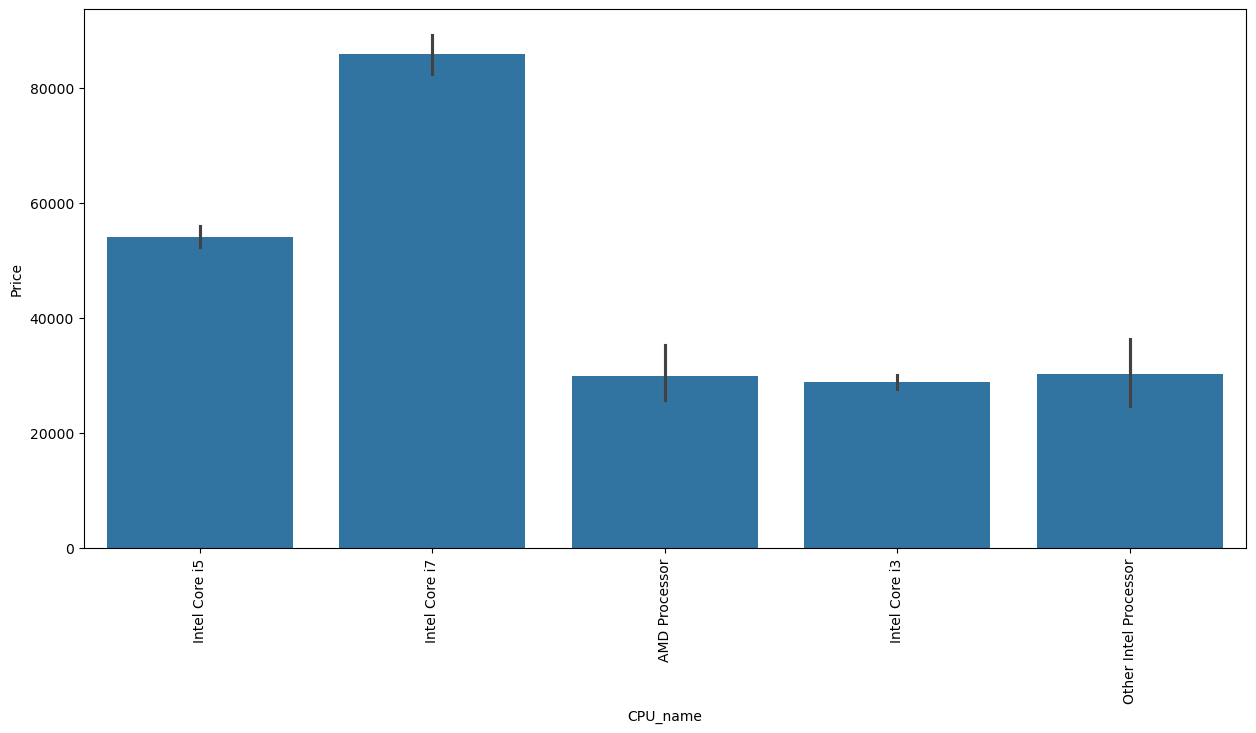

In [334]:
plt.figure(figsize=(15,7))
sn.barplot(x=df['CPU_name'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

**We can safely drop the old CPU column from the dataset**

In [337]:
df.drop(columns=['Cpu'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


# **Analysis on the RAM column**

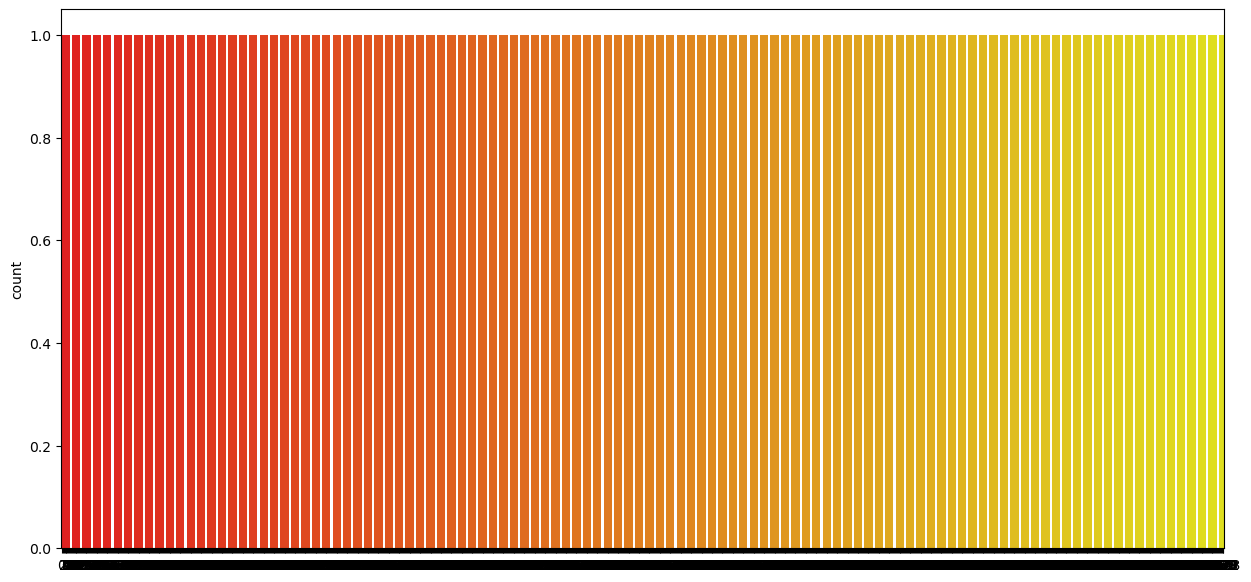

In [340]:
plt.figure(figsize=(15,7))
sn.countplot(df['Ram'],palette='autumn')
plt.show()

# **Barplot - Price vs RAM**

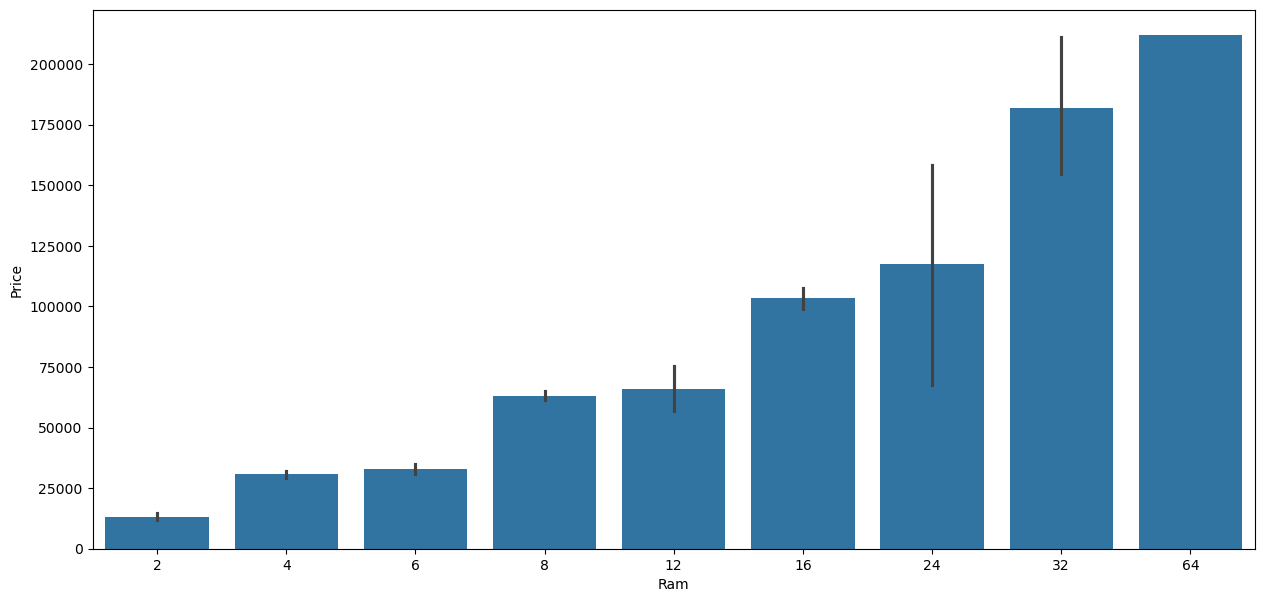

In [342]:
plt.figure(figsize=(15,7))
sn.barplot(x=df['Ram'],y=df['Price'])
plt.show()

**RAM is having good relation with Price**

# **About the memory column**

**We will seperate the `Type` of memory and the value of it,just similar to the one which is done in the previous part**

**This part involves things which are needed to be done in steps,so here we do not have the memory as a complete we have it in different dimension as `128GB SSD +  1TB HDD`,so inorder to for it come in a same dimension we need to do some modifications which are done below as shown**

In [348]:
df['Memory'].iloc[:1][0]

'128GB SSD'

**We have different categories and also different kinds of variations**

In [351]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          215
500GB HDD                        123
512GB SSD                        114
128GB SSD +  1TB HDD              94
128GB SSD                         74
256GB SSD +  1TB HDD              73
32GB Flash Storage                36
2TB HDD                           16
512GB SSD +  1TB HDD              14
1TB SSD                           14
64GB Flash Storage                13
256GB SSD +  2TB HDD              10
256GB Flash Storage                8
16GB Flash Storage                 7
1.0TB Hybrid                       7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

**In here, we will do as follows,**
* **Four most common variants observed: HDD, SSD, Flash, Hybrid**
* **We will remove decimal space for example 1.0 TB will become 1TB**
* **We will replace the word GB with ""**
* **We will replace the word TB with "000"**
* **We will split the word across the "+" character**

In [354]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex = True)
df['Memory'] = df['Memory'].str.replace('GB','')
df['Memory'] = df['Memory'].str.replace('TB','000')
newdf = df['Memory'].str.split("+",n = 1,expand = True)
newdf

,0,1
0,128 SSD,None
1,128 Flash Storage,None
2,256 SSD,None
3,512 SSD,None
4,256 SSD,None
...,...,...
1269,500 HDD,None
1270,128 SSD,None
1271,512 SSD,None
1272,64 Flash Storage,None


**We will strip up all the white spaces, basically eliminating white spaces**

In [357]:
df['first'] = newdf[0]
df['first'] = df['first'].str.strip()
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,first
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128 SSD
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,128 Flash Storage
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256 SSD
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512 SSD
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256 SSD


# **Creating Layer 1 column for each memory type**

In [373]:
def applychanges(value):
    
    df['Layer1'+value] = df['first'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply = ['HDD','SSD','Hybrid','FlashStorage']    
for value in listtoapply:
    applychanges(value)
    
    
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128 SSD,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128 Flash Storage,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256 SSD,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512 SSD,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256 SSD,0,1,0,0,0,0,0,0,0


**We will remove all the character and just keeping the numbers**

In [376]:
df['first'] = df['first'].str.replace(r'\D','')
df['first'].value_counts()

first
256 SSD              500
1000 HDD             217
128 SSD              170
512 SSD              134
500 HDD              123
32 Flash Storage      36
2000 HDD              16
1000 SSD              16
64 Flash Storage      14
256 Flash Storage      8
1000 Hybrid            7
16 Flash Storage       7
32 SSD                 6
180 SSD                5
128 Flash Storage      4
16 SSD                 3
512 Flash Storage      2
240 SSD                1
8 SSD                  1
64 SSD                 1
128 HDD                1
32 HDD                 1
508 Hybrid             1
Name: count, dtype: int64

In [378]:
# Remove all non-numeric characters
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# Check value counts
df['first'].value_counts()

first
256     508
1000    240
128     175
512     136
500     123
32       43
2000     16
64       15
16       10
180       5
240       1
8         1
508       1
Name: count, dtype: int64

In [380]:
df['Second'] = newdf[1]
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,None,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,None,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,None,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,None,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,None,0,0,0,0


# **Creating Layer 2 column for each memory type**

In [383]:
def applychanges1(value):
    
    df['Layer2'+value] = df['Second'].apply(lambda x:1 if value in x else 0)
    
    
listtoapply1 = ['HDD','SSD','Hybrid','FlashStorage']
df['Second'] = df['Second'].fillna("0")
for value in listtoapply1:
    applychanges1(value)

**We will remove all the characters and just keeping the numbers again**

In [388]:
df['Second'] = df['Second'].str.replace(r'\D','', regex=True)
df['Second'].value_counts()

Second
0       1066
1000     187
2000      15
256        3
500        2
512        1
Name: count, dtype: int64

In [390]:
df['first'] = df['first'].astype('int')
df['Second'] = df['Second'].astype('int')
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,...,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1FlashStorage,Second,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2FlashStorage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,128,0,1,0,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,128,0,0,0,0,0,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,256,0,1,0,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,512,0,1,0,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,256,0,1,0,0,0,0,0,0,0


# **Multiplying the elements and storing in subsequent columns**

In [395]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["Second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["Second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["Second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1FlashStorage"]+df["Second"]*df["Layer2FlashStorage"])

**Dropping unecessary columns**

In [398]:
df.drop(columns=['first', 'Second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1FlashStorage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2FlashStorage'],inplace=True)

In [400]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
536,Dell,Notebook,8,256 SSD,AMD Radeon 530,Windows 10,2.20,42486.0048,0,0,141.211998,Intel Core i5,0,256,0,0
1229,MSI,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,61218.7200,0,0,141.211998,Intel Core i7,1000,128,0,0
1119,Asus,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 960M,Windows 10,3.52,69929.4672,0,0,127.335675,Intel Core i7,1000,128,0,0
1011,HP,Ultrabook,4,500 HDD,Intel HD Graphics 620,Windows 10,1.26,81997.9200,0,0,176.232574,Intel Core i5,500,0,0,0
1160,Lenovo,Ultrabook,8,256 SSD,Intel HD Graphics 520,Windows 7,1.70,79866.7200,0,0,157.350512,Intel Core i7,0,256,0,0


In [402]:
df.drop(columns=['Memory'],inplace=True)
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Hybrid,Flash_Storage
586,HP,Gaming,16,Nvidia GeForce GTX 1050,Windows 10,3.78,79813.4400,0,1,127.335675,Intel Core i7,1000,256,0,0
1221,MSI,Gaming,8,Nvidia GeForce GTX 1060,Windows 10,2.20,78647.1408,0,0,141.211998,Intel Core i7,1000,128,0,0
166,Acer,Notebook,4,Intel HD Graphics 505,Windows 10,2.10,19367.8128,0,0,100.454670,Other Intel Processor,1000,0,0,0
1223,Dell,Ultrabook,8,Intel HD Graphics 520,Windows 7,1.26,91288.3536,1,0,176.232574,Intel Core i5,0,256,0,0
616,Dell,Notebook,4,AMD Radeon R5 M420,Linux,2.18,30316.3200,0,0,141.211998,Intel Core i5,0,128,0,0


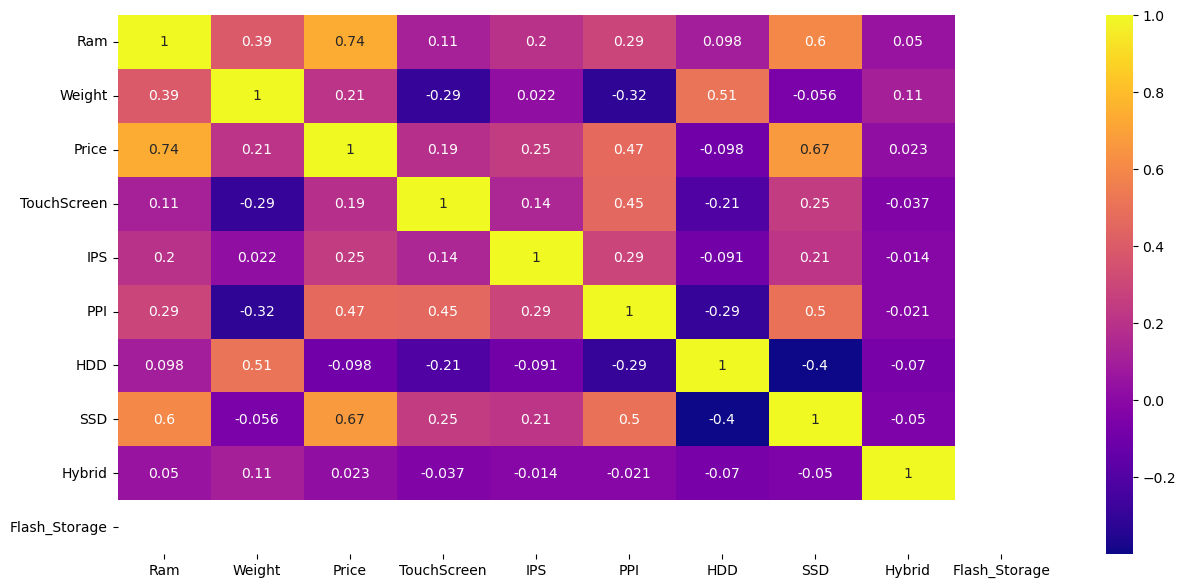

In [406]:
numeric_df = df.select_dtypes(include=[float, int])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
numeric_df = numeric_df.dropna()
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Filter numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
plt.figure(figsize=(15,7))
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

**Based on the correlation we observe that `Hybrid` and `Flash Storage` are almost negligible,so we can simply drop them off,where as HDD and SDD are having good correlation,we find that HDD has -ve relation with Price,and that's true,if the price of laptop is increasing there is more probability that the laptop is gonna use SDD instead of HDD and vice versa as well**

In [409]:
df.columns

Index(['Company', 'TypeName', 'Ram', 'Gpu', 'OpSys', 'Weight', 'Price',
       'TouchScreen', 'IPS', 'PPI', 'CPU_name', 'HDD', 'SSD', 'Hybrid',
       'Flash_Storage'],
      dtype='object')

In [411]:
df.drop(columns = ['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


# **Analysis on GPU**

In [414]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      279
Intel HD Graphics 520      181
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

**Here as we are having less data regarding the laptops,its better that we focus on `GPU brands` instead focusing on the values which are present there beside them,we will focus on the `brands`**

# **Extracting the GPU brands**

In [418]:
a = df['Gpu'].iloc[1]
print(a.split()[0])

Intel


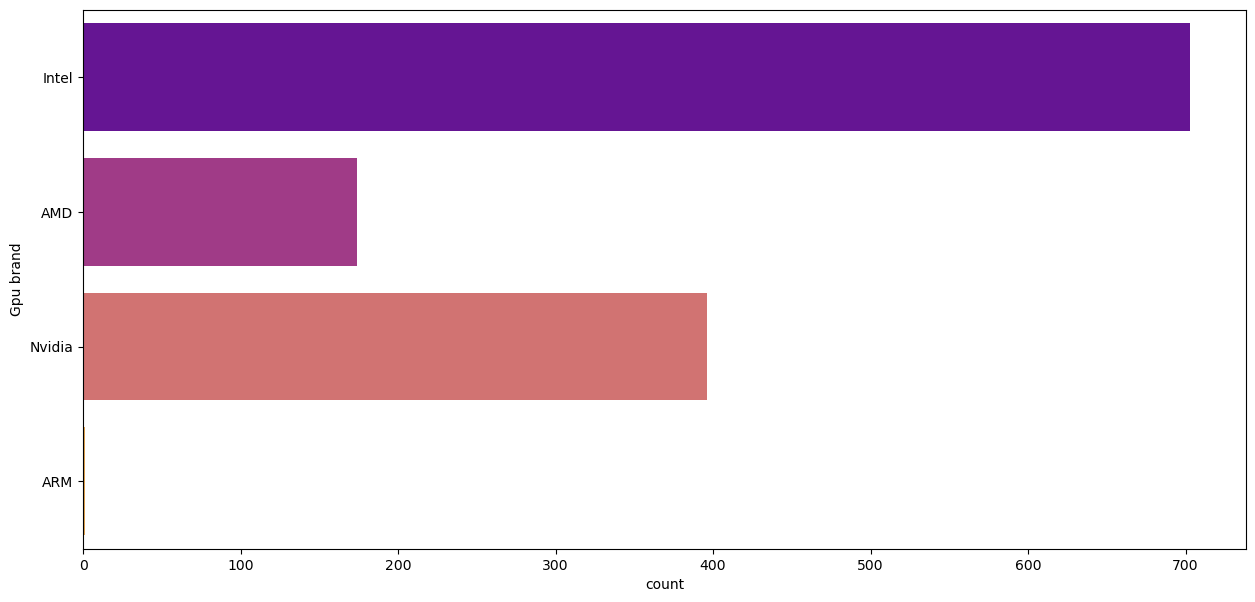

In [420]:
plt.figure(figsize=(15,7))
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

**Removing ARM Tuple**

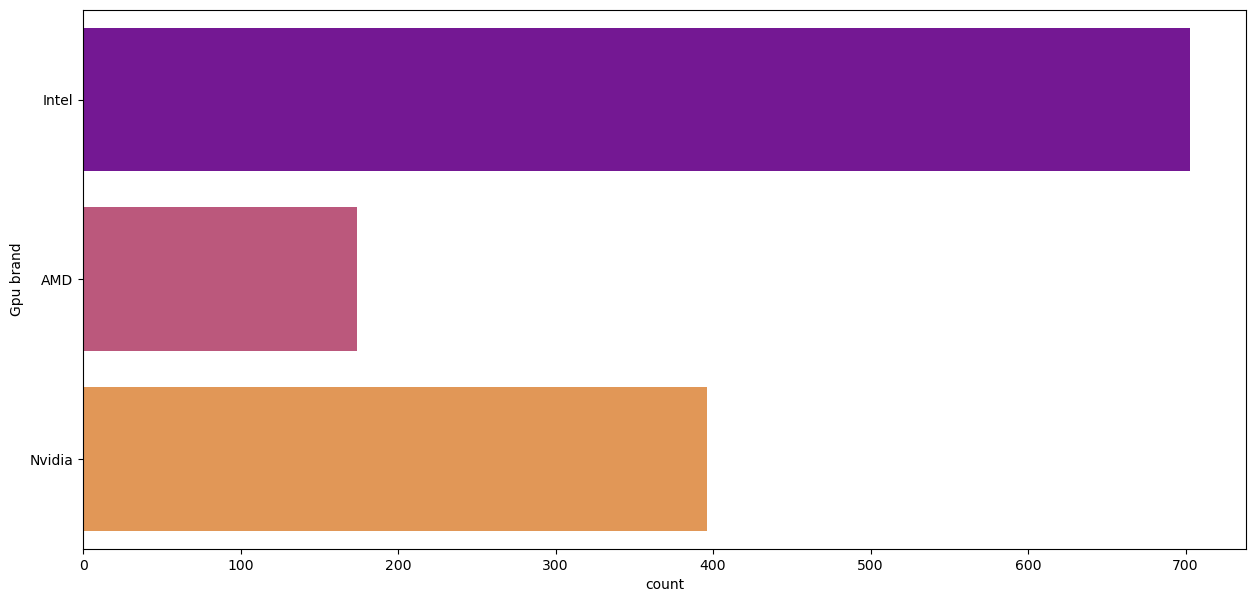

In [423]:
plt.figure(figsize=(15,7))
df = df[df['Gpu brand']!='ARM']
sn.countplot(df['Gpu brand'],palette='plasma')
plt.show()

**I said we can ignore the outliers, but sometimes for fun it will do a great impact on the target analysis. So I used np.median to check if there is any impact or not**

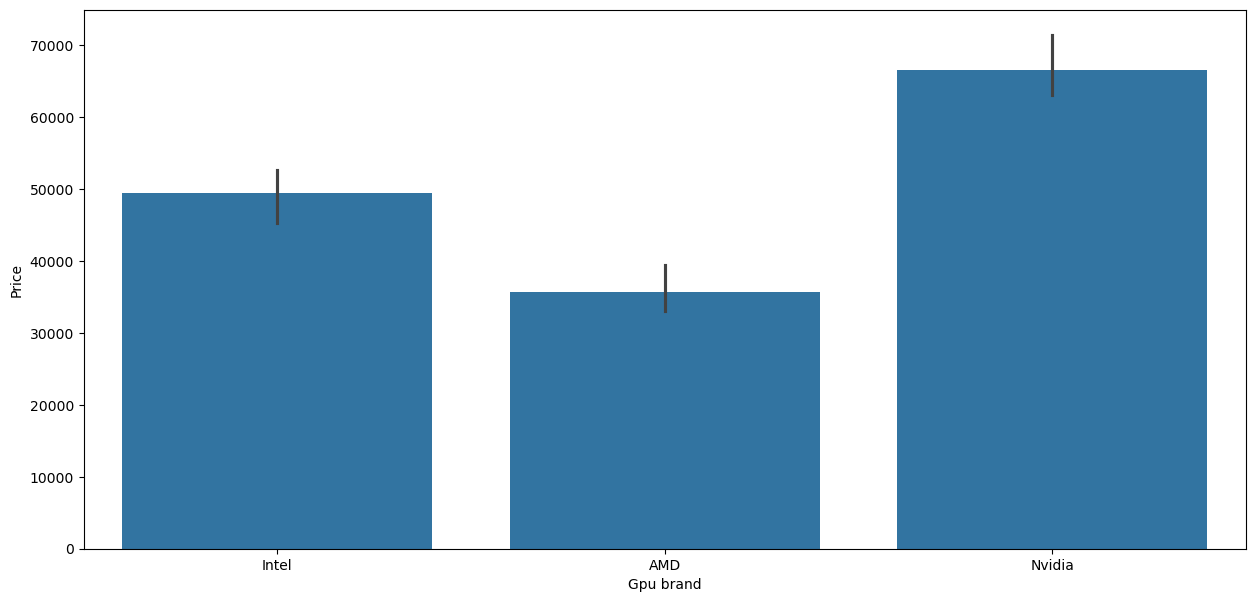

In [428]:
plt.figure(figsize=(15,7))
sn.barplot(x=df['Gpu brand'],y=df['Price'],estimator=np.median)
plt.show()

**Thankfully, this data doesn't make me go crazy. Next we can safely drop the old GPU column**

In [431]:
df = df.drop(columns=['Gpu'])
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


# **Operating System analysis**

In [434]:
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             66
Linux             58
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

# **Barplot - Price variation on OS in laptops**

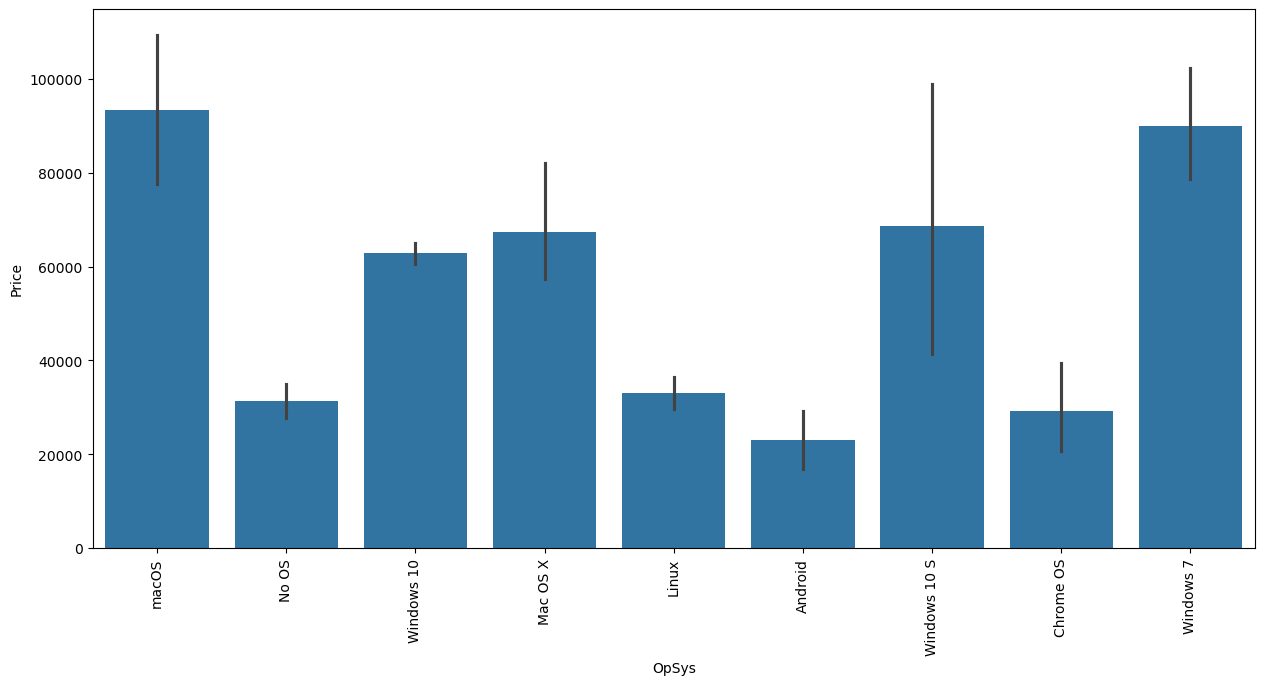

In [439]:
plt.figure(figsize=(15,7))
sn.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation = 'vertical')
plt.show()

In [441]:
df['OpSys'].unique()

array(['macOS', 'No OS', 'Windows 10', 'Mac OS X', 'Linux', 'Android',
       'Windows 10 S', 'Chrome OS', 'Windows 7'], dtype=object)

**We can see that there are many versions of one type of OS, espicially for Windows and macOS. So we can club them together like,**
* **club {Windows 10,Windows 7,Windows 7 S}-->Windows**
* **club {macOS,mac OS X}--> mac**
* **others --> others**

In [444]:
def setcategory(text):
    
    if text=='Windows 10' or text=='Windows 7' or text=='Windows 10 S':
        return 'Windows'
    
    elif text=='Mac OS X' or text=='macOS':
        return 'Mac'
    
    else:
        return 'Other'
    
    
df['OpSys'] = df['OpSys'].apply(lambda x:setcategory(x))

df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [446]:
df.sample(5)

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
247,Asus,Gaming,16,Windows,3.60,159786.7200,0,0,127.335675,Intel Core i7,0,256,Nvidia
1219,Acer,2 in 1 Convertible,8,Windows,1.20,61218.7200,1,1,157.350512,Intel Core i7,0,256,Intel
342,HP,Notebook,8,Windows,2.10,38148.4800,0,1,141.211998,Intel Core i3,1000,0,Nvidia
581,Dell,Notebook,8,Windows,1.90,53733.9456,0,0,100.454670,Intel Core i5,500,0,Intel
1007,HP,Ultrabook,8,Windows,1.43,77202.7200,0,0,157.350512,Intel Core i7,0,256,Intel


# **Countplot for OS types**

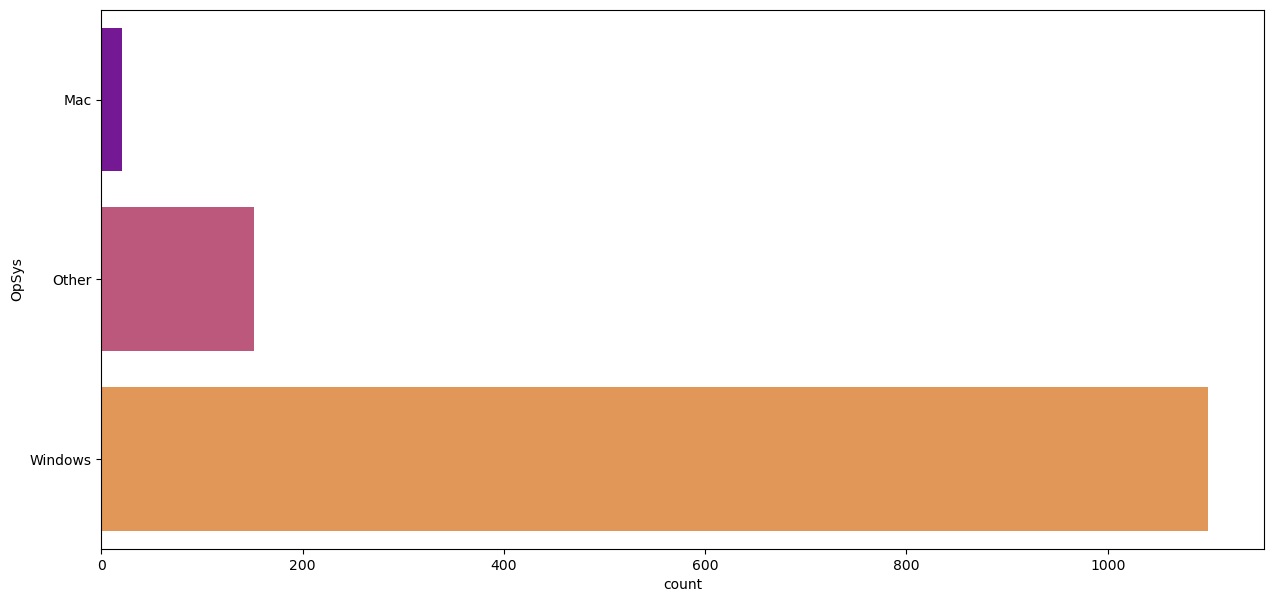

In [449]:
plt.figure(figsize=(15,7))
sn.countplot(df['OpSys'],palette='plasma')
plt.show()

# **Barplot - Price variation on OS types**

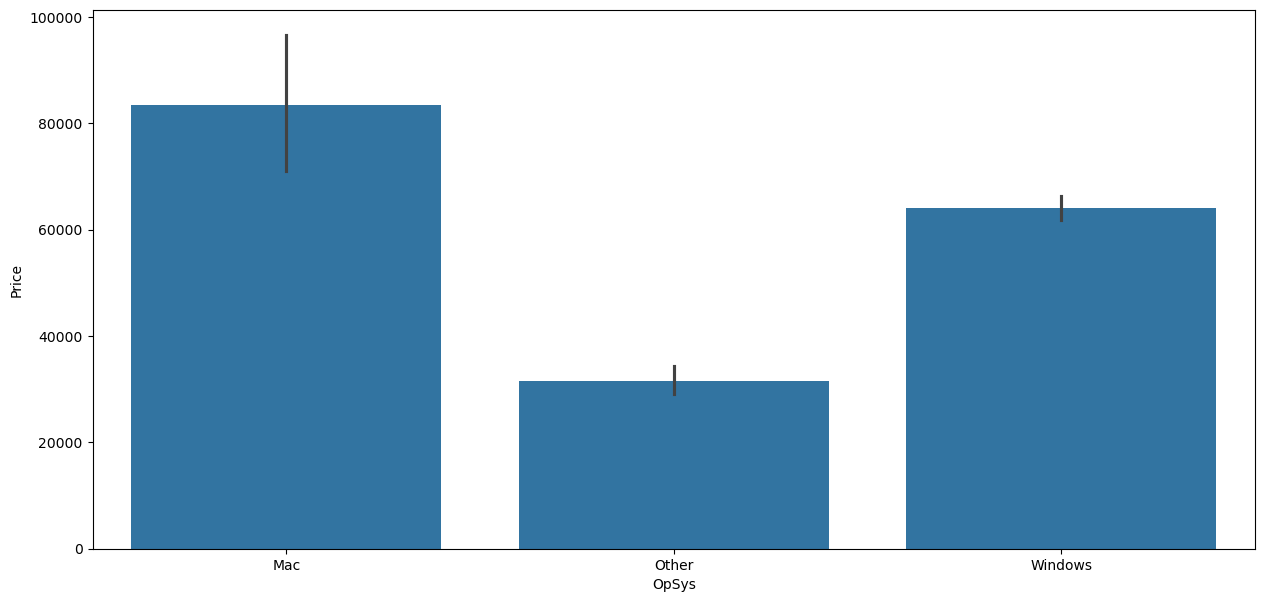

In [452]:
plt.figure(figsize=(15,7))
sn.barplot(x = df['OpSys'],y = df['Price'])
plt.show()

# **Weight analysis**

**Distribution plot on weight column**

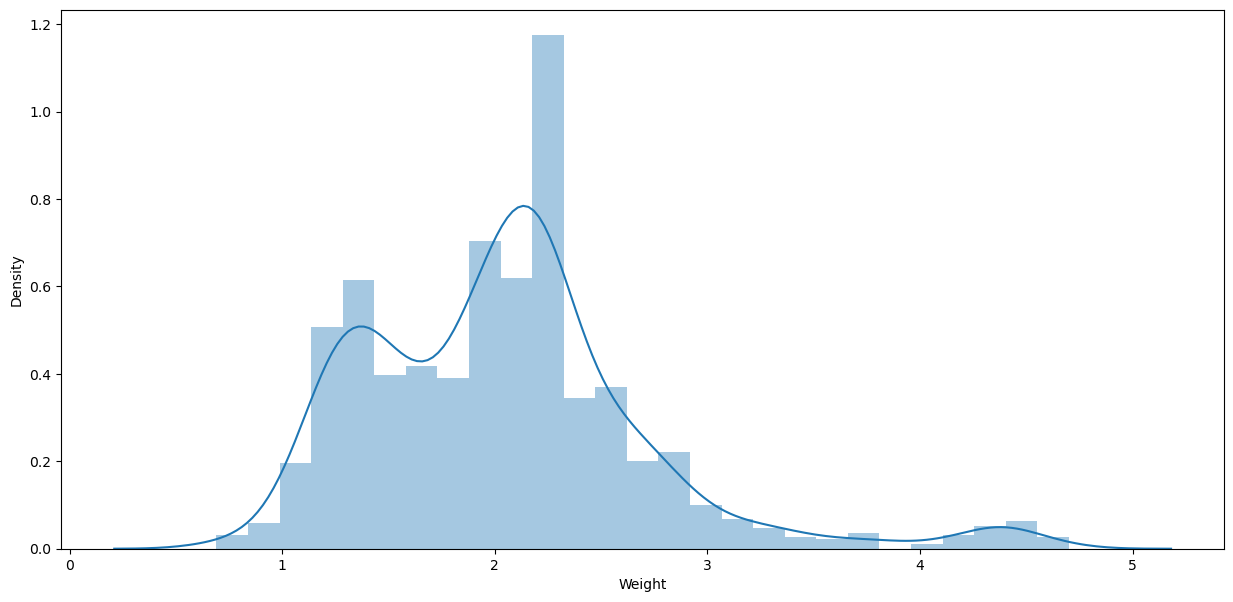

In [456]:
plt.figure(figsize=(15,7))
sn.distplot(df['Weight'])
plt.show()

**Scatterplot - Price variation on weight**

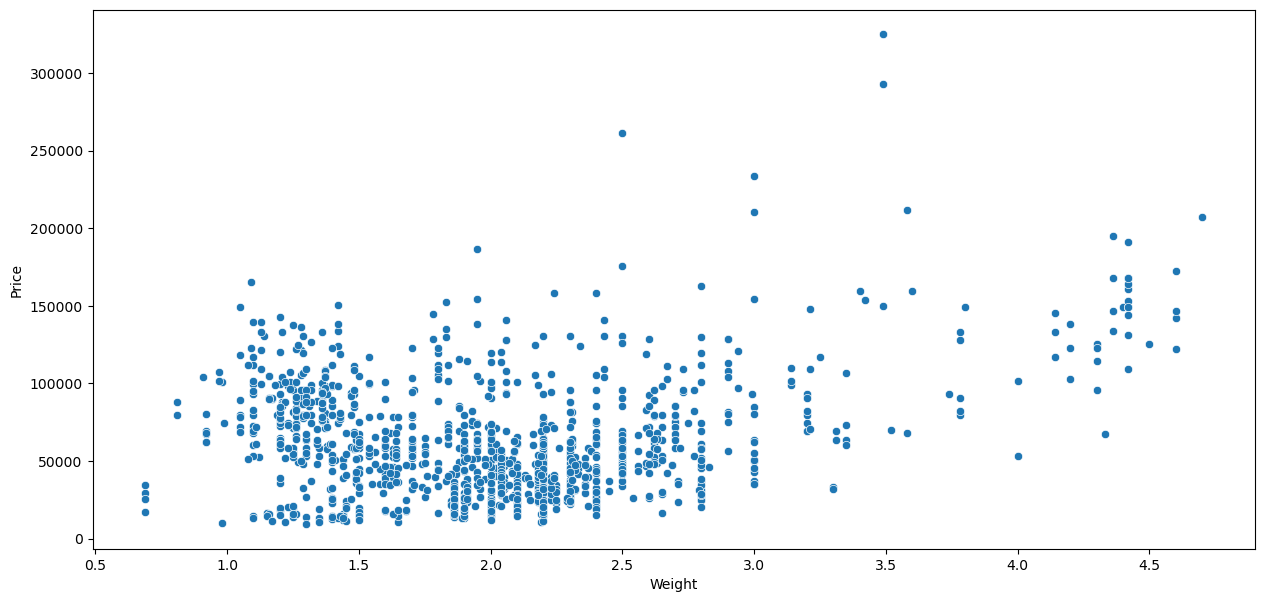

In [462]:
plt.figure(figsize=(15,7))
sn.scatterplot(x=df['Weight'],y=df['Price'])
plt.show()

# **Price Analysis**

**Distribution plot for Price column**

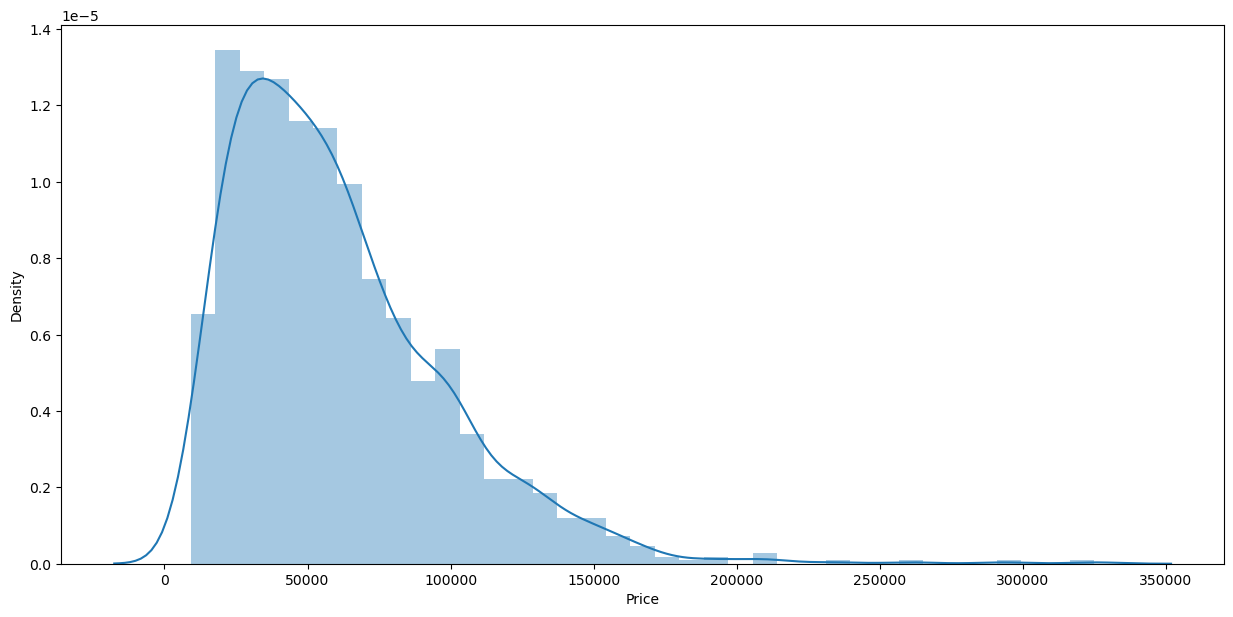

In [466]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'])
plt.show()

**I applied np.log to the Price column and got a Gaussian distribution**

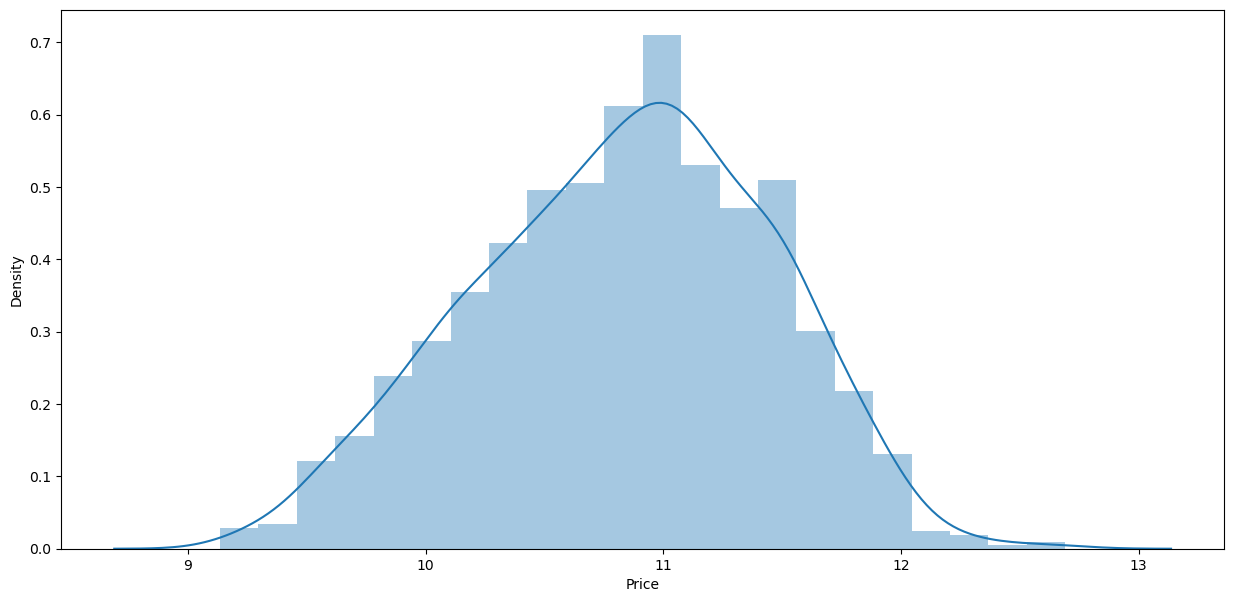

In [469]:
plt.figure(figsize=(15,7))
sn.distplot(np.log(df['Price']))
plt.show()

In [476]:
numeric_df.corr()['Price']

Ram              0.740106
Weight           0.212192
Price            1.000000
TouchScreen      0.188631
IPS              0.250358
PPI              0.469539
HDD             -0.098011
SSD              0.669957
Hybrid           0.022533
Flash_Storage         NaN
Name: Price, dtype: float64

# **Heatmap - Correlation for each features**

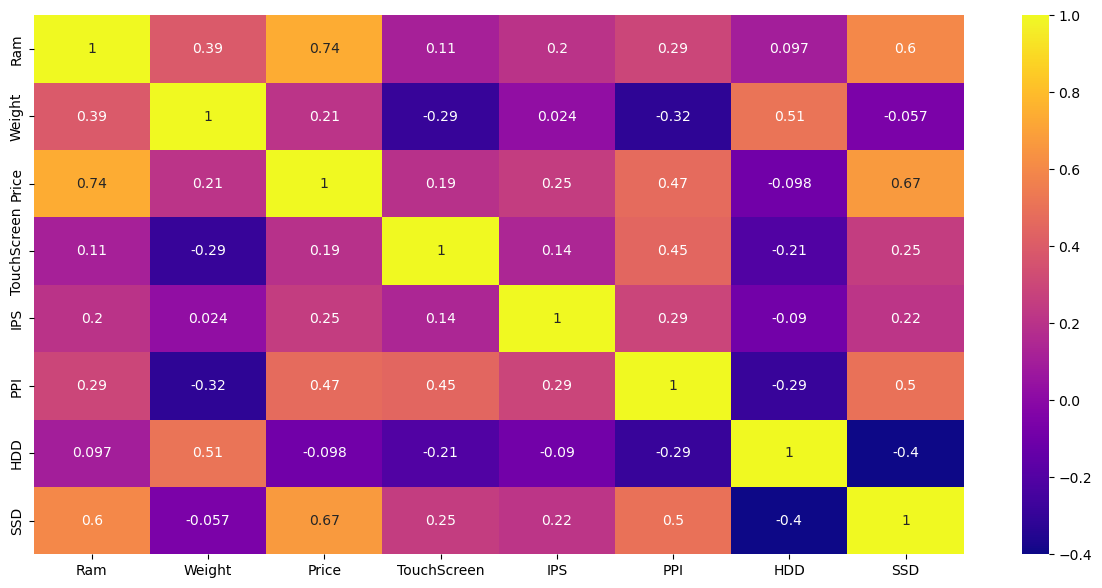

In [480]:
numeric_df = df.select_dtypes(include=[float, int])
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
numeric_df = numeric_df.dropna()
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd

# Filter numeric columns
numeric_df = df.select_dtypes(include=[float, int])

# Create the heatmap
plt.figure(figsize=(15,7))
sn.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

# **Model Building**

**Splitting the training data and testing data**

In [484]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)


In [486]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [488]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1082, 12), (191, 12))

**There's a Class which we imported named as `Column Trasnformer` we use this widely while building our models using `Pipelines`,so for this we have to get the index numbers of the columns which are having categorical variables**

**Creating a hashmap**

In [492]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'OpSys',
 4: 'Weight',
 5: 'TouchScreen',
 6: 'IPS',
 7: 'PPI',
 8: 'CPU_name',
 9: 'HDD',
 10: 'SSD',
 11: 'Gpu brand'}

# **Linear Regression**

**We will apply one hot encoding on the columns with this indices-->[0,1,3,8,11] the remainder we keep as passthrough i.e no other col must get effected except the ones undergoing the transformation!**

In [499]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7831567115450171
MAE 0.22167696491054997


**Now mae is 0.21 so if you want to check how much difference is there do this we see there is a difference of 1.23 only as per the orignal value that is our model predicts +-0.21 more/less than the original price!**

In [502]:
np.exp(0.21)

1.2336780599567432

# **Ridge Regression**

In [507]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7954034359736729
MAE 0.21818884825637255


# **LassoRegression**

In [513]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7930851842744953
MAE 0.21874256893808866


# **Decision Tree**

In [516]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8110742208848016
MAE 0.20302175594658636


# **Random Forest**

In [521]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(drop='first'),[0,1,3,8,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8554034002634634
MAE 0.1779991811367265


# **Pickling the ML pipeline and the data**

In [524]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [526]:
train.head()

,Company,TypeName,Ram,OpSys,Weight,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Mac,1.34,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Other,1.86,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,Mac,1.83,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Mac,1.37,0,1,226.983005,Intel Core i5,0,256,Intel


In [528]:
train.to_csv('traineddata.csv',index=None)

# **Hyperparameter Tuning for Random Forest**

In [531]:
indexlist = [0,1,3,8,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'OpSys', 'CPU_name', 'Gpu brand']

In [533]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,TouchScreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,OpSys_Other,OpSys_Windows,CPU_name_Intel Core i3,CPU_name_Intel Core i5,CPU_name_Intel Core i7,CPU_name_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia
0,8,1.37,0,1,226.983005,0,128,True,False,False,...,True,False,False,False,False,True,False,False,True,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,False,False,True,False,False,True,False
2,8,1.86,0,0,141.211998,0,256,False,False,False,...,False,False,True,False,False,True,False,False,True,False
3,16,1.83,0,1,220.534624,0,512,True,False,False,...,True,False,False,False,False,False,True,False,False,False
4,8,1.37,0,1,226.983005,0,256,True,False,False,...,True,False,False,False,False,True,False,False,True,False


In [535]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1082, 38), (191, 38))

[Text(0.4966721043442235, 0.9782608695652174, 'Ram <= 7.0\nsquared_error = 0.386\nsamples = 1082\nvalue = 10.831'),
 Text(0.21749755186811295, 0.9347826086956522, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 351\nvalue = 10.217'),
 Text(0.3570848281061682, 0.9565217391304348, 'True  '),
 Text(0.1443270596590909, 0.8913043478260869, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.134\nsamples = 255\nvalue = 10.377'),
 Text(0.09707784521349862, 0.8478260869565217, 'CPU_name_Intel Core i7 <= 0.5\nsquared_error = 0.083\nsamples = 152\nvalue = 10.221'),
 Text(0.03974797692837465, 0.8043478260869565, 'Weight <= 1.645\nsquared_error = 0.07\nsamples = 136\nvalue = 10.175'),
 Text(0.007713498622589532, 0.7608695652173914, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.064\nsamples = 10\nvalue = 10.587'),
 Text(0.005509641873278237, 0.717391304347826, 'Weight <= 1.395\nsquared_error = 0.02\nsamples = 8\nvalue = 10.478'),
 Text(0.004407713498622589, 0.6739130434782609

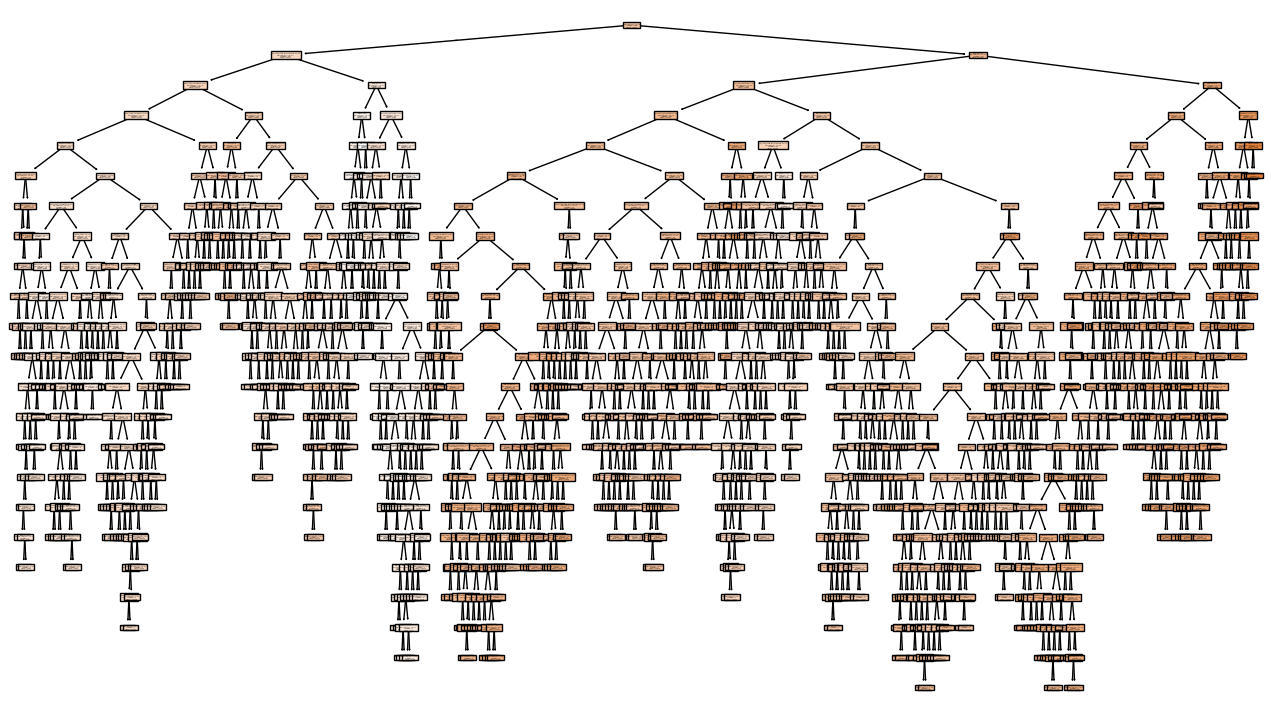

In [537]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [538]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [539]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

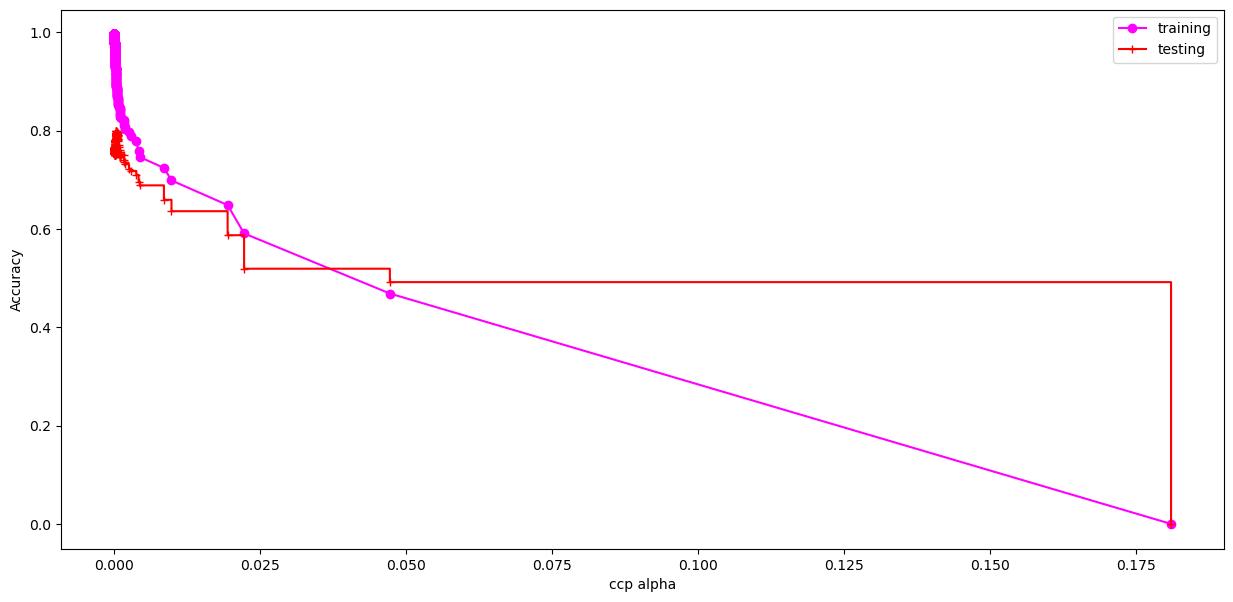

In [540]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.figure(figsize=(15,7))
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

**possible values of alpha can lie between `[0.0025-->0.0075]`**

[Text(0.5555555555555556, 0.9, 'Ram <= 7.0\nsquared_error = 0.386\nsamples = 1082\nvalue = 10.831'),
 Text(0.3333333333333333, 0.7, 'CPU_name_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 351\nvalue = 10.217'),
 Text(0.4444444444444444, 0.8, 'True  '),
 Text(0.2222222222222222, 0.5, 'CPU_name_Intel Core i5 <= 0.5\nsquared_error = 0.134\nsamples = 255\nvalue = 10.377'),
 Text(0.1111111111111111, 0.3, 'squared_error = 0.083\nsamples = 152\nvalue = 10.221'),
 Text(0.3333333333333333, 0.3, 'squared_error = 0.12\nsamples = 103\nvalue = 10.608'),
 Text(0.4444444444444444, 0.5, 'squared_error = 0.079\nsamples = 96\nvalue = 9.79'),
 Text(0.7777777777777778, 0.7, 'Ram <= 14.0\nsquared_error = 0.214\nsamples = 731\nvalue = 11.125'),
 Text(0.6666666666666667, 0.8, '  False'),
 Text(0.6666666666666666, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.154\nsamples = 537\nvalue = 10.966'),
 Text(0.5555555555555556, 0.3, 'squared_error = 0.101\nsamples = 265\nvalue = 11.167'),
 Text

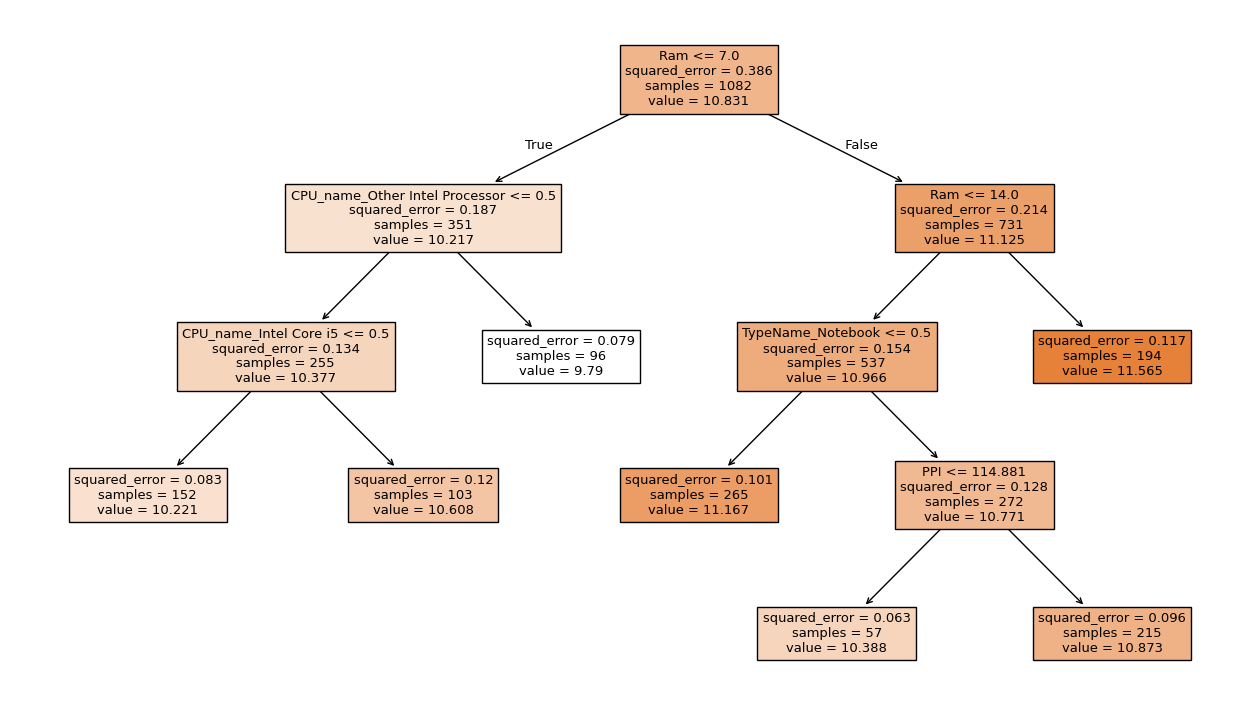

In [542]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [567]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':['absolute_error', 'squared_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':['absolute_error', 'squared_error'],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [569]:
scores = []
for modelname,mp in params.items():
    clf = RandomizedSearchCV(mp['model'],
                            param_distributions=mp['params'],cv = 5,
                            n_iter=10,scoring='neg_mean_squared_error',verbose=2)
    clf.fit(X_train,y_train)
    scores.append({
        'model_name':modelname,
        'best_score':clf.best_score_,
        'best_estimator':clf.best_estimator_,
    })

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.01, criterion=squared_error, max_depth=1, max_features=auto, min_samples_leaf=10, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END ccp_alpha=0.0075, criterion=squared_error, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_

In [570]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator
0,RandomForest,-0.086773,"(DecisionTreeRegressor(ccp_alpha=0.005, max_de..."
1,Decision Tree,-0.144177,"DecisionTreeRegressor(ccp_alpha=0.005, max_dep..."


In [573]:
scores

[{'model_name': 'RandomForest',
  'best_score': -0.08677309782004324,
  'best_estimator': RandomForestRegressor(ccp_alpha=0.005, max_depth=15, max_features='sqrt',
                        min_samples_leaf=5, n_estimators=222)},
 {'model_name': 'Decision Tree',
  'best_score': -0.14417670726445747,
  'best_estimator': DecisionTreeRegressor(ccp_alpha=0.005, max_depth=22, max_features='log2',
                        min_samples_leaf=5)}]

In [575]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8554034002634634


# Prediction on the whole Dataset

In [578]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.2665153]),
 array([11.23074567]),
 array([10.7726256]),
 array([11.60782102]),
 array([11.2709033]),
 array([10.19034522]),
 array([11.60628066]),
 array([11.23074567]),
 array([11.51137094]),
 array([10.99074227]),
 array([10.45338321]),
 array([10.21048858]),
 array([11.60751719]),
 array([10.24211227]),
 array([11.2746327]),
 array([11.2709033]),
 array([10.90166421]),
 array([11.60782102]),
 array([10.67474277]),
 array([11.23725286]),
 array([9.79083914]),
 array([10.97610228]),
 array([10.15923812]),
 array([10.99044059]),
 array([11.06355383]),
 array([10.19013629]),
 array([11.23074567]),
 array([10.87632056]),
 array([11.05090937]),
 array([10.80416026]),
 array([9.78985274]),
 array([10.30384489]),
 array([10.24266205]),
 array([11.60755429]),
 array([11.23074567]),
 array([9.78985274]),
 array([10.15902919]),
 array([10.89243228]),
 array([10.49376245]),
 array([10.88378582]),
 array([10.21048858]),
 array([11.44440624]),
 array([10.39882657]),
 array([10.49754421

**As we transformed our price variable to np.log, we have to retranform it from np.log-->np.exp inorder to get the result**

In [580]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [581]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,78160.157445
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,75413.807907
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,47697.086708
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,109954.400246
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,78503.877535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,0,0,100.454670,Intel Core i7,500,0,Nvidia,26754.001573
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,30534.936090
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,109954.400246
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,17851.677062


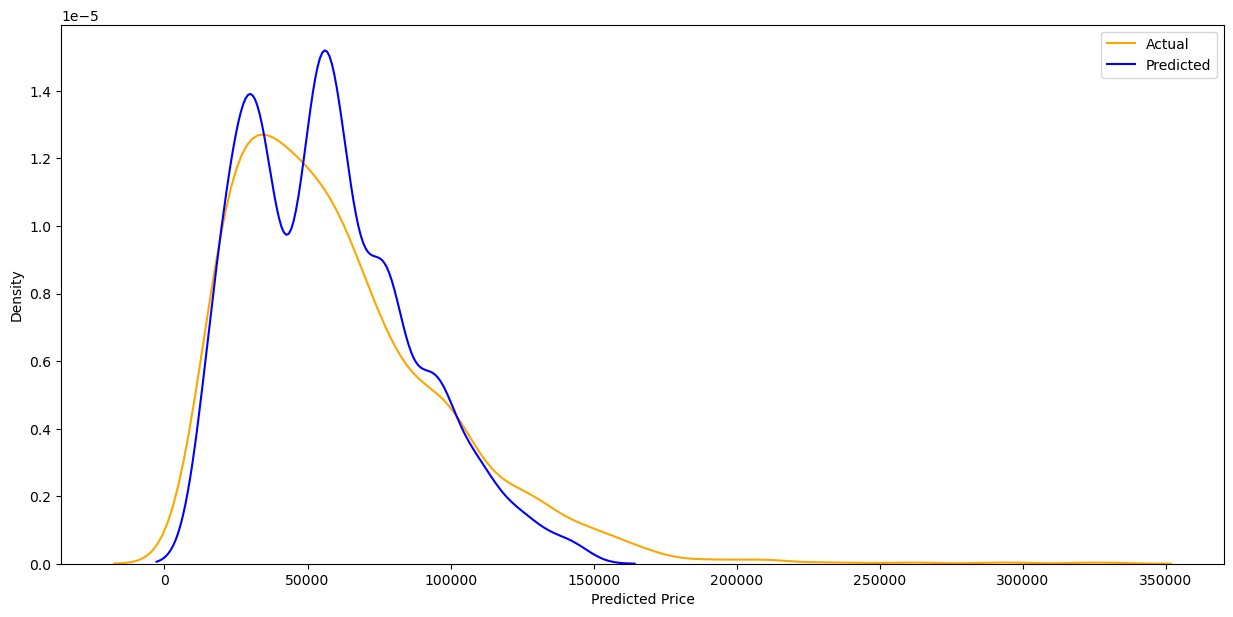

In [582]:
plt.figure(figsize=(15,7))
sn.distplot(df['Price'],hist=False,color='orange',label='Actual')
sn.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# **Random Forest Regressor - My Version**

In [584]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8506261097238673


In [590]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([11.1965297]),
 array([10.89288169]),
 array([10.60590178]),
 array([11.78902622]),
 array([11.30006717]),
 array([9.93311475]),
 array([11.49832556]),
 array([10.89288169]),
 array([11.45432219]),
 array([10.77706049]),
 array([10.12303557]),
 array([9.91338662]),
 array([11.74729104]),
 array([10.24918628]),
 array([11.16931395]),
 array([11.30006717]),
 array([10.74957617]),
 array([11.78902622]),
 array([10.32056729]),
 array([11.00682417]),
 array([9.55940465]),
 array([10.86671996]),
 array([9.75351088]),
 array([10.83880539]),
 array([10.71081598]),
 array([10.12836927]),
 array([10.93455936]),
 array([10.69921184]),
 array([11.14549148]),
 array([10.78099134]),
 array([9.60202847]),
 array([9.93546303]),
 array([10.16039651]),
 array([11.64171597]),
 array([10.93455936]),
 array([9.63247132]),
 array([9.95468369]),
 array([10.88250593]),
 array([10.30067349]),
 array([10.76530206]),
 array([9.9945435]),
 array([11.28638408]),
 array([10.34208339]),
 array([10.55165529]),

In [591]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [592]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,PPI,CPU_name,HDD,SSD,Gpu brand,Predicted Price
0,Apple,Ultrabook,8,Mac,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,72877.097381
1,Apple,Ultrabook,8,Mac,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,53792.089132
2,HP,Notebook,8,Other,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,40372.404754
3,Apple,Ultrabook,16,Mac,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,131798.065204
4,Apple,Ultrabook,8,Mac,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,80827.066809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,Asus,Notebook,4,Windows,2.20,38378.6496,0,0,100.454670,Intel Core i7,500,0,Nvidia,36145.790448
1270,Lenovo,2 in 1 Convertible,4,Windows,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,38182.810151
1271,Lenovo,2 in 1 Convertible,16,Windows,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,95808.229659
1272,Lenovo,Notebook,2,Windows,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,14850.122653


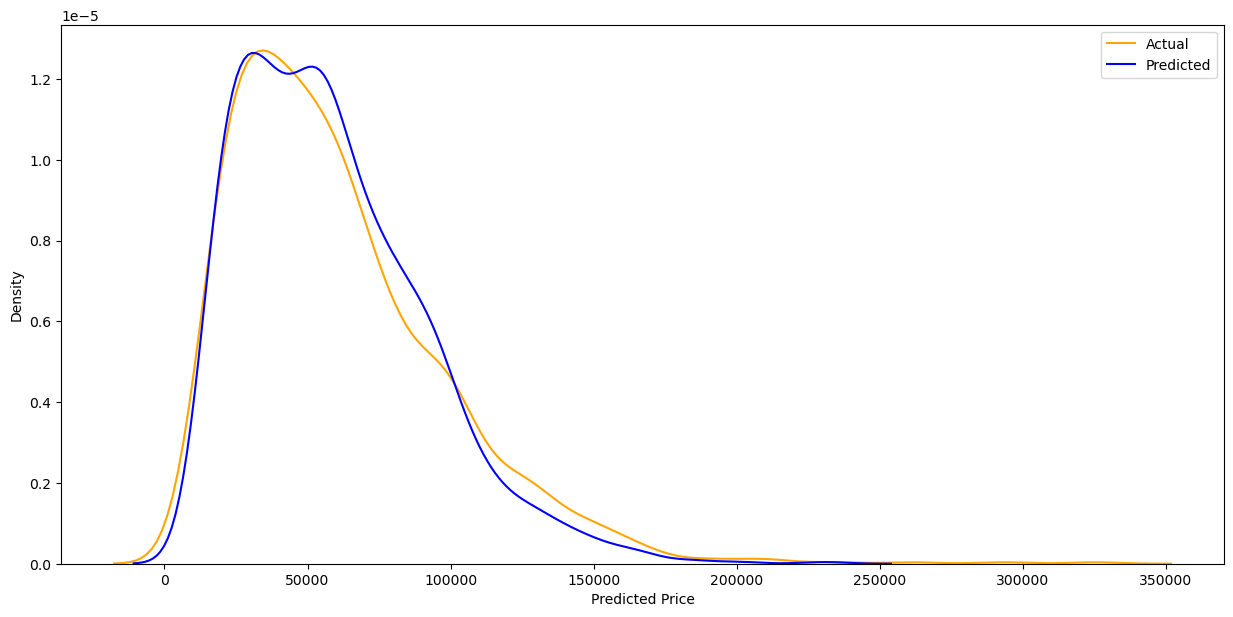

In [596]:
plt.figure(figsize=(15,7))
sn.distplot(data['Price'],hist=False,color='orange',label='Actual')
sn.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# **Pickling our version of model**

In [599]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()